# Global Observations of Nonlinear Mesoscale Eddies 
<a href="https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta2-0-dt.html">The Altimetric Mesoscale Eddy Trajectories Atlas (META2.0) </a>

This notebook is for analyzing data from the Chelton (2011) tracks. The dataset is updated annual and currently has eddy tracks from Jan. 1993 to Mar. 2020. 

The tracks are stored as an xarray DataSet, which is a collection of DataArrays. Positional indexing is not supported for DataSets. The dimensions of this DataSet is obs (observations) which is a 1D array from 0–27,880,804 which are indices of each instance of an eddy detected in the global dataset. 

## Import Functions:

In [1]:
# adds upper level to working directory, this is where the utils folder is saved
import sys
sys.path.append("..")

# import the util functions
from utils.eddy_plot_utils import *
from utils.eddy_data_utils import *

## Load Data:

In [2]:
###################################  Load Files ####################################################################

# xarray DataArray of Northwest Atlantic Bathymetry
bathy = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/nwa_bathy.nc')

# Numpy array of tracks of eddies in northwest atlantic
nwa_tracks = np.load('/Users/elenaperez/Desktop/rings/data/np_arrays/nwa_tracks.npy')

# Pandas DataFrame for Northwest Atlantic tracks
nwa_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/nwa_eddies.pkl') # all eddies in nwa based on nwa_tracks
nwa_wcr_df = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/nwa_wcr_df.pkl')  # all wcrs in nwa based on is_wcr
nwa_ccr_df = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/nwa_ccr_df.pkl')  # all ccrs in nwa based on is_ccr

nwa_ccr_day_df = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/nwa_ccr_day_df.pkl')  # all ccrs in nwa based on is_ccr and DAILY gs paths
nwa_wcr_day_df = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/nwa_wcr_day_df.pkl')  # all wcrs in nwa based on is_ccr and DAILY gs paths


# open eddy df for Gangopadhyay et al., 2020 zones
zone_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_eddies.pkl') # all zones
zone1_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone1_eddies.pkl') 
zone2_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone2_eddies.pkl') 
zone3_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone3_eddies.pkl')
zone4_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone4_eddies.pkl') 

# open *CCR* dfs for Gangopadhyay et al., 2020 zones
zone_ccrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_ccrs.pkl') # all zones
zone1_ccrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone1_ccrs.pkl') 
zone2_ccrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone2_ccrs.pkl') 
zone3_ccrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone3_ccrs.pkl') 
zone4_ccrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone4_ccrs.pkl') 

# open *WCR* dfs for Gangopadhyay et al., 2020 zones
zone_wcrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_wcrs.pkl') # all zones
zone1_wcrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone1_wcrs.pkl') 
zone2_wcrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone2_wcrs.pkl') 
zone3_wcrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone3_wcrs.pkl') 
zone4_wcrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone4_wcrs.pkl') 

# # open ring *ANNUAL* formation counts
zone_ccr_annual_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_ccr_annual_formations.pkl')
zone_wcr_annual_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_wcr_annual_formations.pkl')
zone_aeddy_annual_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_aeddy_annual_formations.pkl')
zone_ceddy_annual_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_ceddy_annual_formations.pkl')

# # open ring *MONTHLY* formation counts
zone_ccr_monthly_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_ccr_monthly_formations.pkl')
zone_wcr_monthly_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_wcr_monthly_formations.pkl')
zone_aeddy_monthly_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_aeddy_monthly_formations.pkl')
zone_ceddy_monthly_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_ceddy_monthly_formations.pkl')

## open ring *ALL YEARS, ALL MONTHS* formation counts
zone_ccr_all_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_ccr_all_formations.pkl')
zone_wcr_all_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_wcr_all_formations.pkl')
zone_aeddy_all_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_aeddy_all_formations.pkl')
zone_ceddy_all_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_ceddy_all_formations.pkl')

zone_eddies_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_eddies_formations.pkl') # all zones


gs = loadmat('/Users/elenaperez/Desktop/rings/data/gulf_stream/GS_daily_CMEMS_047_50cm_contours_1993_to_nrt.mat')
for d in range(len(gs['time'][0])-1):
    gs['time'][0][d] = gs['time'][0][d]+date.toordinal(date(1950,1,1))

#####################################################################################################################


###################################  Data Variables of Chelton Eddy Tracks ##########################################
#                                                                                                                   #
#   amplitude             : Magnitude of the height difference between the extremum of SSH within the               #
#                                      eddy and the SSH around the effective contour defining the eddy edge         #
#                                                                                                                   #
#   cyclonic_type         : Cyclonic -1; Anti-cyclonic +1                                                           #
#                                                                                                                   #
#   latitude              : Eddy Center Latitude                                                                    #
#                                                                                                                   #
#   longitude             : Eddy Center Longitude                                                                   # 
#                                                                                                                   #
#   observation_flag      : Flag indicating if the value is interpolated between two observations                   # 
#                                      or not (0: observed eddy, 1: interpolated eddy)                              #
#                                                                                                                   #
#   observation_number    : Observation sequence number, days starting at the eddy first detection                  #
#                                                                                                                   #
#   speed_average         : Average speed of the contour defining the radius scale “speed_radius” [m/s]                   #
#                                                                                                                   #
#   speed_radius          : Radius of a circle whose area is equal to that enclosed by the contour                  # 
#                                      of maximum circum-average speed [m]                                             #
#                                                                                                                   #
#   time                  : Date of this observation                                                                #
#                                                                                                                   #
#   track                 : Trajectory identification number                                                        #
#                                                                                                                   #
#####################################################################################################################

# read more about the variables
# https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product.html
# https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta2-0-dt.html

# to preview the eddy DataFrame 
len(nwa_eddies[(nwa_eddies['cyclonic_type']==-1)]['track'].unique())

4438

## Data Handling:

In [7]:
nwa_eddies[nwa_eddies['observation_number']==0]

amplitude  cyclonic_type   latitude  longitude  observation_flag  \
274           0.420            1.0  39.384399 -63.705994               0.0   
368           0.418            1.0  40.207401 -48.834015               0.0   
476           0.315            1.0  39.722099 -59.311005               0.0   
5061          0.117            1.0  35.335800 -43.033997               0.0   
6122          0.164            1.0  28.225599 -75.027008               0.0   
...             ...            ...        ...        ...               ...   
27871290      0.045           -1.0  25.119400 -58.898987               0.0   
27872269      0.268           -1.0  40.472099 -57.583008               0.0   
27872703      0.095           -1.0  38.320900 -69.265991               0.0   
27875557      0.043           -1.0  42.381699 -54.656006               0.0   
27880132      0.320           -1.0  35.673302 -66.239014               0.0   

          observation_number  speed_average  speed_radius       time     track  
274                      0.0         0.8002       71650.0 1993-01-01       4.0  
368                      0.0         0.6925      145950.0 1993-01-01       5.0  
476                      0.0         0.7196       99300.0 1993-01-01       7.0  
5061                     0.0         0.2425      102250.0 1993-01-01      57.0  
6122                     0.0         0.3390       90800.0 1993-01-01      65.0  
...                      ...            ...           ...        ...       ...  
27871290                 0.0         0.1575       59700.0 2020-01-25  379692.0  
27872269                 0.0         0.6316      107750.0 2020-01-27  379717.0  
27872703                 0.0         0.2857       97350.0 2020-01-28  379728.0  
27875557                 0.0         0.2149       46700.0 2020-02-01  379807.0  
27880132                 0.0         0.7282       50650.0 2020-02-09  379951.0  

[9238 rows x 10 columns]

In [4]:
zone_wcrs['track'].unique()

array([  1621.,   2185.,   2347.,   2654.,   3369.,   3457.,   4017.,
         4959.,   5374.,   5977.,   6635.,   9526.,   9588.,   9892.,
        10330.,  10368.,  10517.,  11573.,  12034.,  12605.,  12791.,
        13986.,  14547.,  15016.,  15319.,  15436.,  16443.,  16731.,
        17034.,  17872.,  18179.,  20457.,  20693.,  22211.,  22212.,
        24033.,  24585.,  25652.,  26124.,  26430.,  27772.,  27838.,
        28146.,  28944.,  29543.,  30325.,  31162.,  31523.,  31604.,
        33500.,  33557.,  34124.,  34538.,  35655.,  36335.,  36632.,
        37072.,  38376.,  38492.,  39132.,  40536.,  41946.,  42422.,
        42958.,  43009.,  43348.,  44130.,  44309.,  44310.,  44944.,
        46038.,  46190.,  46403.,  46689.,  47104.,  47618.,  48476.,
        48935.,  49577.,  50374.,  51662.,  51858.,  51990.,  52793.,
        53255.,  54113.,  55291.,  55464.,  56130.,  56446.,  57016.,
        57138.,  57577.,  59201.,  59355.,  60497.,  60587.,  61134.,
        61289.,  614

In [4]:
# DELETE LATER
ccr_df = zone_ccrs

annual_eddy = ccr_df[(ccr_df['time'].dt.year == 1995)]
eddy = annual_eddy[annual_eddy['track']==202900.0]

is_wcr(eddy)

15063065    False
dtype: bool

In [18]:
eddy_df = nwa_eddies

## CCRs ##
ccr_tracks = []
for i in np.array(eddy_df['track'].unique()):
    eddy = eddy_df[eddy_df['track']==i]
    if ((eddy['time'].dt.year<2018).all()): # cuts off at 2018, since GS stop halfway through 2018
        if is_ccr(eddy).all() & eddy_moves_west(eddy).all():
            ccr_tracks.append(i)

# cut eddies that aren't ccrs out of eddy df to form ring df
eddy_ccr_df = eddy_df[eddy_df['track'].isin(ccr_tracks)]

# save ccr df as pickled file
eddy_ccr_df.to_pickle('/Users/elenaperez/Desktop/chatts/data/pd_dataframes/nwa_ccr_df.pkl') 

## WCRs ##
wcr_tracks = []
for i in np.array(eddy_df['track'].unique()):
    eddy = eddy_df[eddy_df['track']==i]
    if ((eddy['time'].dt.year<2018).all()): # cuts off at 2018, since GS stop halfway through 2018
        if is_wcr(eddy).all() & eddy_moves_west(eddy).all():
            wcr_tracks.append(i)

# cut eddies that aren't ccrs out of eddy df to form ring df
eddy_wcr_df = eddy_df[eddy_df['track'].isin(wcr_tracks)]

# save ccr df as pickled file
eddy_wcr_df.to_pickle('/Users/elenaperez/Desktop/chatts/data/pd_dataframes/nwa_wcr_df.pkl')

In [7]:
zone_wcrs

amplitude  cyclonic_type   latitude  longitude  observation_flag  \
274           0.420            1.0  39.384399 -63.705994               0.0   
275           0.429            1.0  39.363400 -63.690002               0.0   
276           0.426            1.0  39.426701 -63.652008               0.0   
277           0.399            1.0  39.538898 -63.606995               0.0   
278           0.404            1.0  39.574600 -63.602997               0.0   
...             ...            ...        ...        ...               ...   
12783056      0.052            1.0  41.771702 -61.791992               0.0   
12783057      0.058            1.0  41.735199 -61.756012               0.0   
12783058      0.033            1.0  41.721802 -61.739014               0.0   
12783059      0.042            1.0  41.764000 -61.783997               0.0   
12783060      0.034            1.0  41.840099 -61.794006               0.0   

          observation_number  speed_average  speed_radius       time     track  
274                      0.0         0.8002       71650.0 1993-01-01       4.0  
275                      1.0         0.8257       74250.0 1993-01-02       4.0  
276                      2.0         0.8279       92500.0 1993-01-03       4.0  
277                      3.0         0.8548       96500.0 1993-01-04       4.0  
278                      4.0         0.8940       96500.0 1993-01-05       4.0  
...                      ...            ...           ...        ...       ...  
12783056                59.0         0.2054       55900.0 2017-12-25  171234.0  
12783057                60.0         0.2347       47000.0 2017-12-26  171234.0  
12783058                61.0         0.1929       45000.0 2017-12-27  171234.0  
12783059                62.0         0.2158       44950.0 2017-12-28  171234.0  
12783060                63.0         0.2097       40650.0 2017-12-29  171234.0  

[19387 rows x 10 columns]

In [58]:
# def is_wcr(eddy):
#     """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
#     This function uses mutliple criterion to filter out warm core rings from mesoscale eddies. The criteria is:
#         1) is the eddy anti-cyclonic
#         2) is the eddy formed north of -0.25 deg of the Gulf path
#     Essentially, we expect to find WCRs between the GS path and the continental shelf.
#     Since the resolution of the datasets is coarse, we use -0.25 deg margin since our first criteria of
#     anti-cylonicity would filter out cold core rings from being counted as warm core rings.
    
#     Input:
#         eddy (DataFrame)  : Pandas DataFrame with data from a single eddy 

#     Output:
#         (bool)            : returns true if eddy is north of Gulf Stream for given date, else returns false

#     """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#     eddy_lon = get_eddy_formation_loc(eddy)[0] # lon of eddy formation
#     eddy_lat = get_eddy_formation_loc(eddy)[1] # lat of eddy formation

#     eddy_year = get_eddy_formation_time(eddy)[0] # year of eddy formation
#     eddy_month = get_eddy_formation_time(eddy)[1] # month of eddy formation

#     gs_lon_np = get_gs_month(eddy_year,eddy_month)[0] # np array of gs lon
#     gs_lat_np = get_gs_month(eddy_year,eddy_month)[1] # np array of gs lat

#     gs_lon_len = len(gs_lon_np) # length of gs lon array

#     eddy_lon_np = np.full(gs_lon_len, eddy_lon) # populate 1D array of gs_lon len with eddy formation lon

#     min_index = np.argmin(abs(gs_lon_np-eddy_lon_np)) # what index of gs lon array is the closest to eddy formation lon

#     return ((eddy_lat >= gs_lat_np.T[min_index]-0.25) & (is_geq_100m_isobath(eddy) & (eddy['cyclonic_type']==1).all()) & (eddy_lat <= gs_lat_np.T[min_index]+3)) # if true then eddy formation is north of gs path


# def eddy_df_to_ring_df(eddy_df):
#     """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#     Input:
#         eddy_df (DataFrame)    : pandas dataframe of eddies
#         df_name (String)       : name of df that will be saved

        
#     Output:
#         new_df (DataFrame)     : pandas dataframe of specified type of rings (e.g. WCRs or CCRs)
    
     
#     """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
#     ## CCRs ##
#     ccr_tracks = []
#     for i in np.array(eddy_df['track'].unique()):
#         eddy = eddy_df[eddy_df['track']==i]
#         if ((eddy['time'].dt.year<2018).all()): # cuts off at 2018, since GS stop halfway through 2018
#             if is_ccr(eddy).all():
#                 ccr_tracks.append(i)

#     # cut eddies that aren't ccrs out of eddy df to form ring df
#     eddy_ccr_df = eddy_df[eddy_df['track'].isin(ccr_tracks)]

#     # save ccr df as pickled file
#     eddy_ccr_df.to_pickle('/Users/elenaperez/Desktop/chatts/data/pd_dataframes/nwa_ccr_df.pkl') 
        
#     ## WCRs ##
#     wcr_tracks = []
#     for i in np.array(eddy_df['track'].unique()):
#         eddy = eddy_df[eddy_df['track']==i]
#         if ((eddy['time'].dt.year<2018).all()): # cuts off at 2018, since GS stop halfway through 2018
#             if is_wcr(eddy).all():
#                 wcr_tracks.append(i)

#     # cut eddies that aren't ccrs out of eddy df to form ring df
#     eddy_wcr_df = eddy_df[eddy_df['track'].isin(wcr_tracks)]

#     # save ccr df as pickled file
#     eddy_wcr_df.to_pickle('/Users/elenaperez/Desktop/chatts/data/pd_dataframes/nwa_wcr_df.pkl')
    
# eddy_df_to_ring_df(nwa_eddies)

In [ ]:
# %%time

# '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#     call reprocess_data_notebook from this cell when you want to reprocess eddy & ring DataFrames
#     usually would be used after redefining bounds for the region or zones
#     or if you redefine the criteria for what consitutes a warm core ring or cold core rings
#     or if you download a new version of gs_paths or chelton_tracks
# '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

# %run /Users/elenaperez/Desktop/chatts/chatts_repo/notebooks/reprocess_data_notebook.ipynb


## Data Analysis:

In [ ]:
# open clark charts
clarkFormationsCounts = pd.read_csv('/Users/elenaperez/Desktop/chatts/data/clark_charts/RingFormationNumbers.csv')
clarkFormationsCounts_wcr = clarkFormationsCounts.rename(columns={'Year':'year','WCR':'all_zones','CCR':'ccr'})
clarkFormationsCounts_ccr = clarkFormationsCounts.rename(columns={'Year':'year','WCR':'wcr','CCR':'all_zones'})

In [ ]:
# select 1993-2017 of Clark charts to have similar TS to Chelton
clark_ccr_93_17 = clarkFormationsCounts_ccr[(clarkFormationsCounts_ccr['year']>1992) & (clarkFormationsCounts_ccr['year']<2018)]
clark_wcr_93_17 = clarkFormationsCounts_wcr[(clarkFormationsCounts_wcr['year']>1992) & (clarkFormationsCounts_wcr['year']<2018)]

# create pandas dataframes with column for Clark and column for Chelton
wcr_data = [np.array(clark_wcr_93_17['all_zones']), np.array(zone_wcr_annual_formations['all_zones'])]
wcr_data = np.transpose(wcr_data)
wcr_comparison = pd.DataFrame(wcr_data, columns=['clark','chelton'])

ccr_data = [np.array(clark_ccr_93_17['all_zones']), np.array(zone_ccr_annual_formations['all_zones'])]
ccr_data = np.transpose(ccr_data)
ccr_comparison = pd.DataFrame(ccr_data, columns=['clark','chelton'])


In [39]:
zone_df_names = {'zone_wcrs':0, 'zone1_wcrs':1, 'zone2_wcrs':2, 'zone3_wcrs':3, 'zone4_wcrs':4,
                'zone_ccrs':0, 'zone1_ccrs':1, 'zone2_ccrs':2, 'zone3_ccrs':3, 'zone4_ccrs':4}

for zone in zone_df_names:
    if zone != None and 'ccr' in zone:
        zone_df_names[zone] = zone_ccrs[(zone_ccrs['longitude']>=zone_lon[zone_df_names[zone]][0]) & (zone_ccrs['longitude']<=zone_lon[zone][1])]

TypeError: list indices must be integers or slices, not str

In [55]:
count_annual_formations(zone1_ccrs, 'zone1')

year  zone1
0   1993.0    1.0
1   1994.0    2.0
2   1995.0    3.0
3   1996.0    0.0
4   1997.0    1.0
5   1998.0    0.0
6   1999.0    0.0
7   2000.0    1.0
8   2001.0    0.0
9   2002.0    2.0
10  2003.0    2.0
11  2004.0    1.0
12  2005.0    1.0
13  2006.0    1.0
14  2007.0    1.0
15  2008.0    0.0
16  2009.0    3.0
17  2010.0    2.0
18  2011.0    2.0
19  2012.0    2.0
20  2013.0    3.0
21  2014.0    0.0
22  2015.0    1.0
23  2016.0    1.0
24  2017.0    2.0

In [59]:
zone_lat = [30,45] # N
zone_lon = [[-75,-55],[-75,-70],[-70,-65],[-65,-60],[-60,-55]]

# make_wcr_ccrlike_df_by_zone():
# WCRs
zone1_wcrs = zone_wcrs[(zone_wcrs['longitude']>=zone_lon[1][0]) & (zone_wcrs['longitude']<=zone_lon[1][1])]
zone2_wcrs = zone_wcrs[(zone_wcrs['longitude']>=zone_lon[2][0]) & (zone_wcrs['longitude']<=zone_lon[2][1])]
zone3_wcrs = zone_wcrs[(zone_wcrs['longitude']>=zone_lon[3][0]) & (zone_wcrs['longitude']<=zone_lon[3][1])]
zone4_wcrs = zone_wcrs[(zone_wcrs['longitude']>=zone_lon[4][0]) & (zone_wcrs['longitude']<=zone_lon[4][1])]

# CCRs
zone1_ccrs = zone_ccrs[(zone_ccrs['longitude']>=zone_lon[1][0]) & (zone_ccrs['longitude']<=zone_lon[1][1])]
zone2_ccrs = zone_ccrs[(zone_ccrs['longitude']>=zone_lon[2][0]) & (zone_ccrs['longitude']<=zone_lon[2][1])]
zone3_ccrs = zone_ccrs[(zone_ccrs['longitude']>=zone_lon[3][0]) & (zone_ccrs['longitude']<=zone_lon[3][1])]
zone4_ccrs = zone_ccrs[(zone_ccrs['longitude']>=zone_lon[4][0]) & (zone_ccrs['longitude']<=zone_lon[4][1])]


def count_annual_formations(ring_df, which_zone):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    This function takes a DataFrame of rings and return a new DataFrame of the number of annual formations for 
    that type of rings (e.g. wcr or ccr)
    
    Input:
        ring_df (DataFrame)              : pandas dataframe of rings
        
    Output:
        ring_annual_count_df (DataFrame) : pandas dataframe of annual ring formations
    
     
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    year_range = np.arange(min(ring_df['time'].dt.year), max(ring_df['time'].dt.year)+1)
    var = ['year', which_zone]

    df_structure = np.zeros((len(year_range), len(var)))
    ring_annual_count_df = pd.DataFrame(df_structure, columns = var)

    counter = 0
    for i in year_range:
        annual_formations = len((ring_df[(ring_df['time'].dt.year == i) & (ring_df['observation_number']==0)])['track'].unique())
        ring_annual_count_df.iloc[counter]=[i, annual_formations]
        counter += 1
        
    return ring_annual_count_df

zones_wcrs = {'zone1':zone1_wcrs, 'zone2':zone2_wcrs, 'zone3':zone3_wcrs, 'zone4':zone4_wcrs}
zones_ccrs = {'zone1':zone1_ccrs, 'zone2':zone2_ccrs, 'zone3':zone3_ccrs, 'zone4':zone4_ccrs}

# wcrs
zone_wcr_annual_formations = count_annual_formations(zone_wcrs, 'all_zones')
for zone in zones_wcrs:
    zone_wcr_annual_formations[zone] = count_annual_formations(zones_wcrs[zone], zone)[zone]
    
# ccrs
zone_ccr_annual_formations = count_annual_formations(zone_ccrs, 'all_zones')
for zone in zones_ccrs:
    zone_ccr_annual_formations[zone] = count_annual_formations(zones_ccrs[zone], zone)[zone]
    
# zone_wcr_annual_formations
# zone_ccr_annual_formations

# now create zone_wcr_all_formations


year  all_zones  zone1  zone2  zone3  zone4
0   1993.0        8.0    1.0    3.0    1.0    3.0
1   1994.0        6.0    2.0    2.0    1.0    1.0
2   1995.0        8.0    3.0    1.0    3.0    1.0
3   1996.0        5.0    0.0    0.0    3.0    2.0
4   1997.0        5.0    1.0    2.0    1.0    1.0
5   1998.0        5.0    0.0    1.0    2.0    2.0
6   1999.0        6.0    0.0    2.0    2.0    2.0
7   2000.0       16.0    1.0    4.0    3.0    8.0
8   2001.0       10.0    0.0    4.0    1.0    5.0
9   2002.0       11.0    2.0    4.0    3.0    2.0
10  2003.0        6.0    2.0    1.0    1.0    2.0
11  2004.0       10.0    1.0    4.0    2.0    3.0
12  2005.0        7.0    1.0    2.0    2.0    2.0
13  2006.0        6.0    1.0    3.0    1.0    1.0
14  2007.0        7.0    1.0    2.0    1.0    3.0
15  2008.0        9.0    0.0    2.0    2.0    5.0
16  2009.0        8.0    3.0    2.0    2.0    1.0
17  2010.0        9.0    2.0    2.0    1.0    4.0
18  2011.0        8.0    2.0    1.0    3.0    2.0
19  2012.0        7.0    2.0    2.0    1.0    2.0
20  2013.0        9.0    3.0    3.0    0.0    3.0
21  2014.0        8.0    0.0    3.0    5.0    0.0
22  2015.0        5.0    1.0    1.0    1.0    2.0
23  2016.0        5.0    1.0    1.0    2.0    1.0
24  2017.0        3.0    2.0    0.0    1.0    NaN

In [60]:
def count_all_formations(ring_df, which_zone):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    This function takes a DataFrame of rings and return a new DataFrame of the number of monthly formations 
    for that type of ring (e.g. wcr or ccr)
    
    Input:
        ring_df (DataFrame)              : pandas dataframe of rings
        ring_type (String)               : 'wcr' for warm core ring, 'ccr' for cold core ring
        
    Output:
        ring_month_count_df (DataFrame)  : pandas dataframe of monthly ring formations
    
     
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    year_range = np.arange(min(ring_df['time'].dt.year), max(ring_df['time'].dt.year)+1)
    month_range = np.arange(1,13)

    var = ['year', which_zone]

    df_structure = np.zeros((len(month_range)*len(year_range), len(var)))
    ring_all_count_df = pd.DataFrame(df_structure, columns = var)

    counter=0
    for year in year_range:
        for month in month_range:
            ring_formations = len((ring_df[(ring_df['time'].dt.month == month) & (ring_df['time'].dt.year == year) & (ring_df['observation_number']==0)])['track'].unique())
            ring_all_count_df.iloc[counter]=[year, month, ring_formations]
            counter += 1

    return ring_all_count_df

zones_wcrs = {'zone1':zone1_wcrs, 'zone2':zone2_wcrs, 'zone3':zone3_wcrs, 'zone4':zone4_wcrs}
zones_ccrs = {'zone1':zone1_ccrs, 'zone2':zone2_ccrs, 'zone3':zone3_ccrs, 'zone4':zone4_ccrs}

# wcrs
zone_wcr_all_formations = count_all_formations(zone_wcrs, 'all_zones')
for zone in zones_wcrs:
    zone_wcr_all_formations[zone] = count_all_formations(zones_wcrs[zone], zone)[zone]
    
# ccrs
zone_ccr_all_formations = count_all_formations(zone_ccrs, 'all_zones')
for zone in zones_ccrs:
    zone_ccr_all_formations[zone] = count_all_formations(zones_ccrs[zone], zone)[zone]
    
zone_wcr_all_formations
# zone_ccr_all_formations


ValueError: could not broadcast input array from shape (3,) into shape (2,)

In [40]:
zone_ccr_annual_formations=[]
zone_ccr_annual_formations


[]

In [20]:
zone_ccr_annual_formations

year  all_zones  zone_1  zone_2  zone_3  zone_4
0   1993.0        8.0     1.0     3.0     1.0     3.0
1   1994.0        6.0     2.0     2.0     1.0     1.0
2   1995.0        8.0     3.0     1.0     3.0     1.0
3   1996.0        5.0     0.0     0.0     3.0     2.0
4   1997.0        5.0     1.0     2.0     1.0     1.0
5   1998.0        5.0     0.0     1.0     2.0     2.0
6   1999.0        6.0     0.0     2.0     2.0     2.0
7   2000.0       16.0     1.0     4.0     3.0     8.0
8   2001.0       10.0     0.0     4.0     1.0     5.0
9   2002.0       11.0     2.0     4.0     3.0     2.0
10  2003.0        6.0     2.0     1.0     1.0     2.0
11  2004.0       10.0     1.0     4.0     2.0     3.0
12  2005.0        7.0     1.0     2.0     2.0     2.0
13  2006.0        6.0     1.0     3.0     1.0     1.0
14  2007.0        7.0     1.0     2.0     1.0     3.0
15  2008.0        9.0     0.0     2.0     2.0     5.0
16  2009.0        8.0     3.0     2.0     2.0     1.0
17  2010.0        9.0     2.0     2.0     1.0     4.0
18  2011.0        8.0     2.0     1.0     3.0     2.0
19  2012.0        7.0     2.0     2.0     1.0     2.0
20  2013.0        9.0     3.0     3.0     0.0     3.0
21  2014.0        8.0     0.0     3.0     5.0     0.0
22  2015.0        5.0     1.0     1.0     1.0     2.0
23  2016.0        5.0     1.0     1.0     2.0     1.0
24  2017.0        3.0     2.0     NaN     1.0     NaN

## Plots: 
* stats plots
* map plots

### Stat plots:

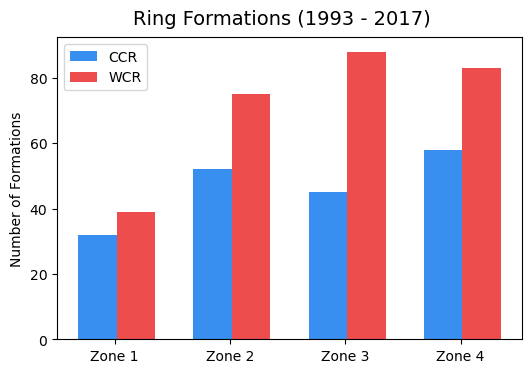

In [14]:
# formations of WCRs vs. CCRs by zone for the time period
zone_bar_plot(zone_ccr_annual_formations, zone_wcr_annual_formations, 'Ring Formations ', 100);

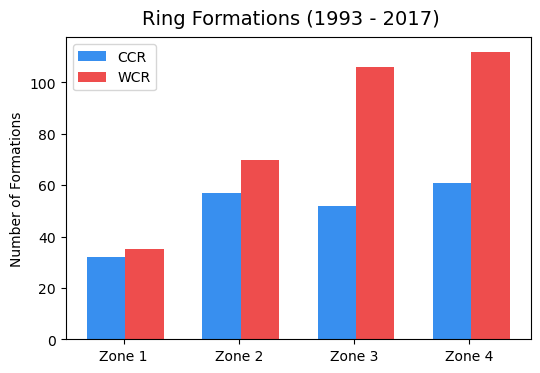

In [3]:
zone_bar_plot(zone_ccr_annual_formations, zone_wcr_annual_formations, 'Ring Formations ', 100);

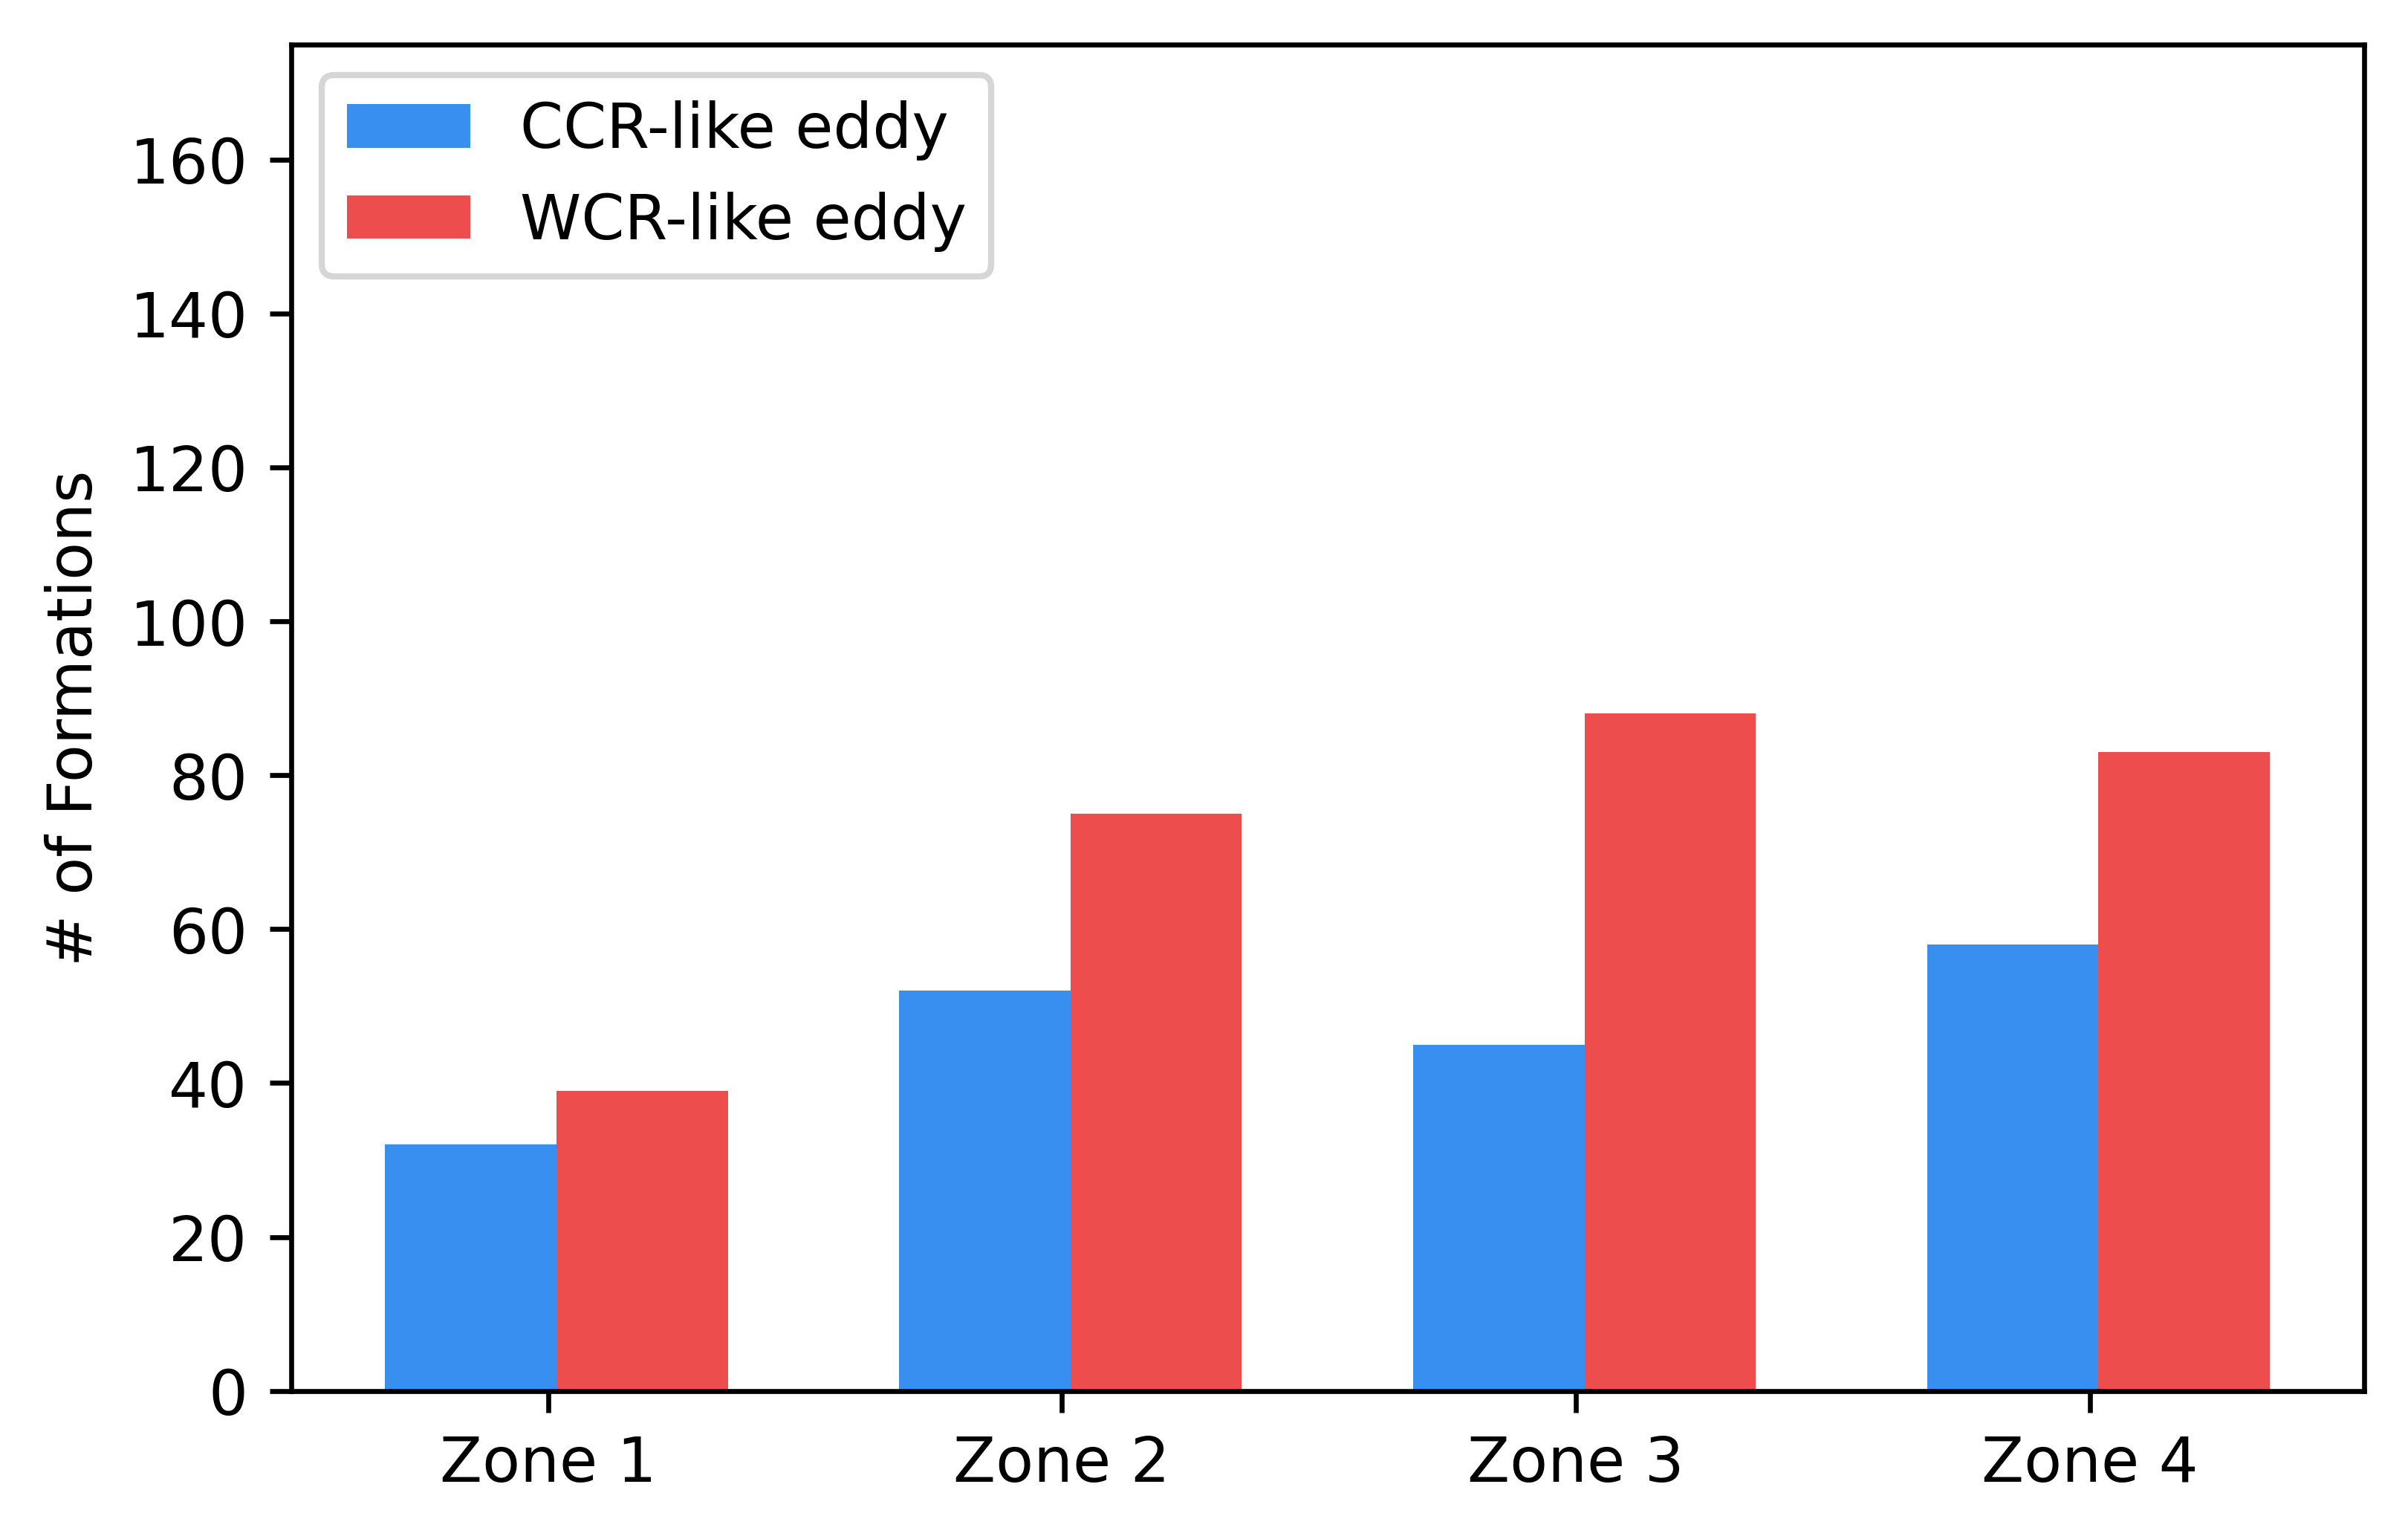

In [13]:
# SPECIAL PLOT FOR MABPOM PRESENTATION
# JUST CHANGING THE Y-AXIS

def zone_bar_plot(ccr_formations_df, wcr_formations_df, title, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
     Input:
        ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones 
        wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones 
        title (Str)                   : title of the figure, e.g. 'Ring Formations Zones 1-4 (1993-2020)'
        fig_quality (Int)             : integer of what dpi the image will be set to (e.g., 100 dpi)


    Output:
        * returns a map of all the eddie tracks for a given year

     
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    # create figure
    fig,ax = plt.subplots();
    fig.set_dpi(fig_quality)

    # calculate optimal width of bar plots' bars
    N = 4 # number of bar pairs i want
    ind = np.arange(N)
    width = np.min(np.diff(ind))/3 # Calculate optimal width
    
    zones = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4']

    ## !OLD!
#     # data
#     anticyclones_count = [len((zone1_eddies[zone1_eddies['cyclonic_type']==+1])['track'].unique()), len((zone2_eddies[zone2_eddies['cyclonic_type']==+1])['track'].unique()), len((zone3_eddies[zone3_eddies['cyclonic_type']==+1])['track'].unique()), len((zone4_eddies[zone4_eddies['cyclonic_type']==+1])['track'].unique())]
#     cyclones_count = [len((zone1_eddies[zone1_eddies['cyclonic_type']==-1])['track'].unique()), len((zone2_eddies[zone2_eddies['cyclonic_type']==-1])['track'].unique()), len((zone3_eddies[zone3_eddies['cyclonic_type']==-1])['track'].unique()), len((zone4_eddies[zone4_eddies['cyclonic_type']==-1])['track'].unique())]
    
    # # plotting
    # ax.bar(ind, cyclones_count , width, label='Cyclones', color='#388FEF')
    # ax.bar(ind + width, anticyclones_count, width, label='Anti-cyclones', color='#EE4D4D')

    # plotting
    ax.bar(ind, ccr_formations_df[['zone_1','zone_2','zone_3','zone_4']].sum() , width, label='CCR-like eddy', color='#388FEF')
    ax.bar(ind + width, wcr_formations_df[['zone_1','zone_2','zone_3','zone_4']].sum(), width, label='WCR-like eddy', color='#EE4D4D')

    ax.set_xticks([0.15,1.15,2.15,3.15])
    ax.set_xticklabels(zones)
    ax.set_ylabel('# of Formations');
    ax.legend(loc='upper left');
    ax.set_ylim([0,175]) #for MABPOM presentation, to be able to compare with Gangopadhyay et al., 2020 fig 1
    
    return fig, ax
# example call in notebook
zone_bar_plot(zone_ccr_annual_formations, zone_wcr_annual_formations, '', 600);


In [8]:
zone_wcr_annual_formations[['zone_1','zone_2','zone_3','zone_4']].sum()

zone_1    39.0
zone_2    75.0
zone_3    88.0
zone_4    83.0
dtype: float64

In [9]:
print('zone 1 % = ',39/(39+75+88+83)*100)
print('zone 2 % = ',75/(39+75+88+83)*100)
print('zone 3 % = ',88/(39+75+88+83)*100)
print('zone 4 % = ',83/(39+75+88+83)*100)

zone 1 % =  13.684210526315791
zone 2 % =  26.31578947368421
zone 3 % =  30.87719298245614
zone 4 % =  29.122807017543863


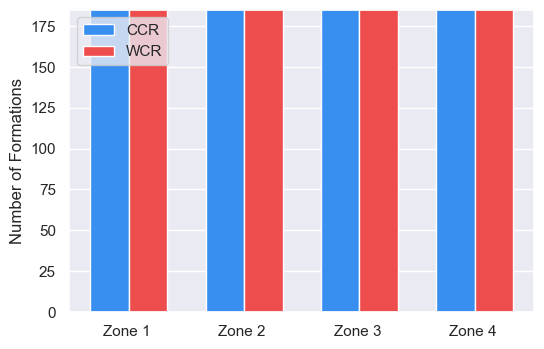

In [22]:
# ACTUALLY EDDIES
zone_bar_plot(zone_ceddy_annual_formations, zone_aeddy_annual_formations, 'Eddy Formations ', 100);

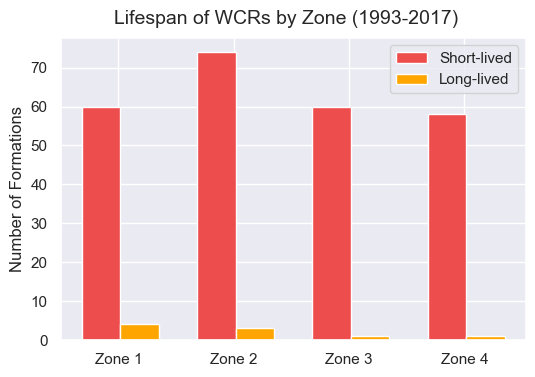

In [23]:
lifespan_bar_chart_zone(short_lived_wcrs, long_lived_wcrs, short_lived_ccrs, long_lived_ccrs, 'Lifespan of WCRs by Zone (1993-2017)', 'wcr', 100);


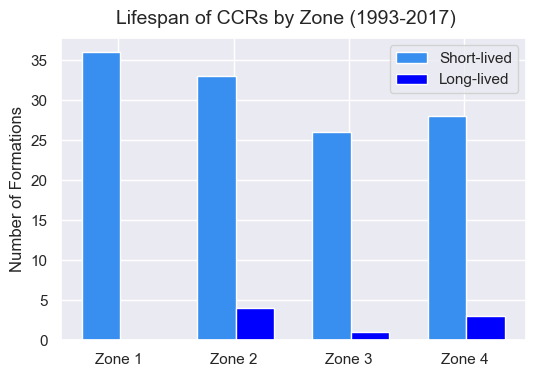

In [24]:
lifespan_bar_chart_zone(short_lived_wcrs, long_lived_wcrs, short_lived_ccrs, long_lived_ccrs, 'Lifespan of CCRs by Zone (1993-2017)', 'ccr', 100);


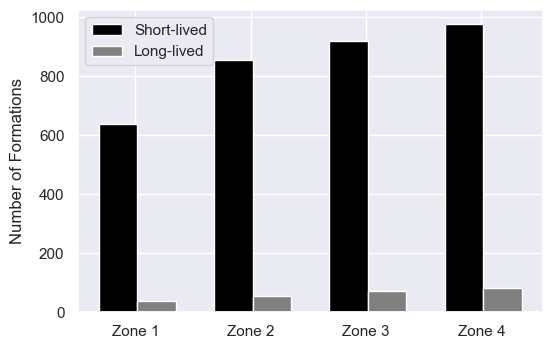

In [25]:
short_eddy_df = short_lived_eddies
long_eddy_df = long_lived_eddies
title = ''
ring_type = 'eddy'
fig_quality = 100

# create figure
fig,ax = plt.subplots();
fig.suptitle(title, y=0.95, fontsize=14);
fig.set_dpi(fig_quality)

# calculate optimal width of bar plots' bars
N = 4 # number of bar pairs i want
ind = np.arange(N)
width = np.min(np.diff(ind))/3 # Calculate optimal width

zones = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4']

# plotting
    
if ring_type=='eddy':
    ax.bar(ind, short_eddy_df.iloc[0], width, label='Short-lived', color='black')
    ax.bar(ind + width, long_eddy_df.iloc[0], width, label='Long-lived', color='grey')
    

ax.set_xticks([0.15,1.15,2.15,3.15])
ax.set_xticklabels(zones)
ax.set_ylabel('Number of Formations');
ax.legend();

### Time-series Plots:

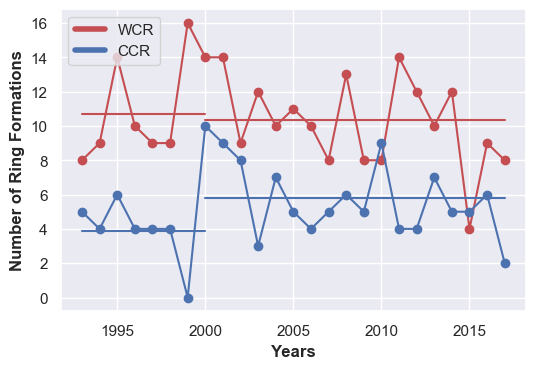

In [26]:
# compare # of annual formations WCR vs. CCR for the entire period
rings_interannual_variability(zone_ccr_annual_formations, zone_wcr_annual_formations, 100);

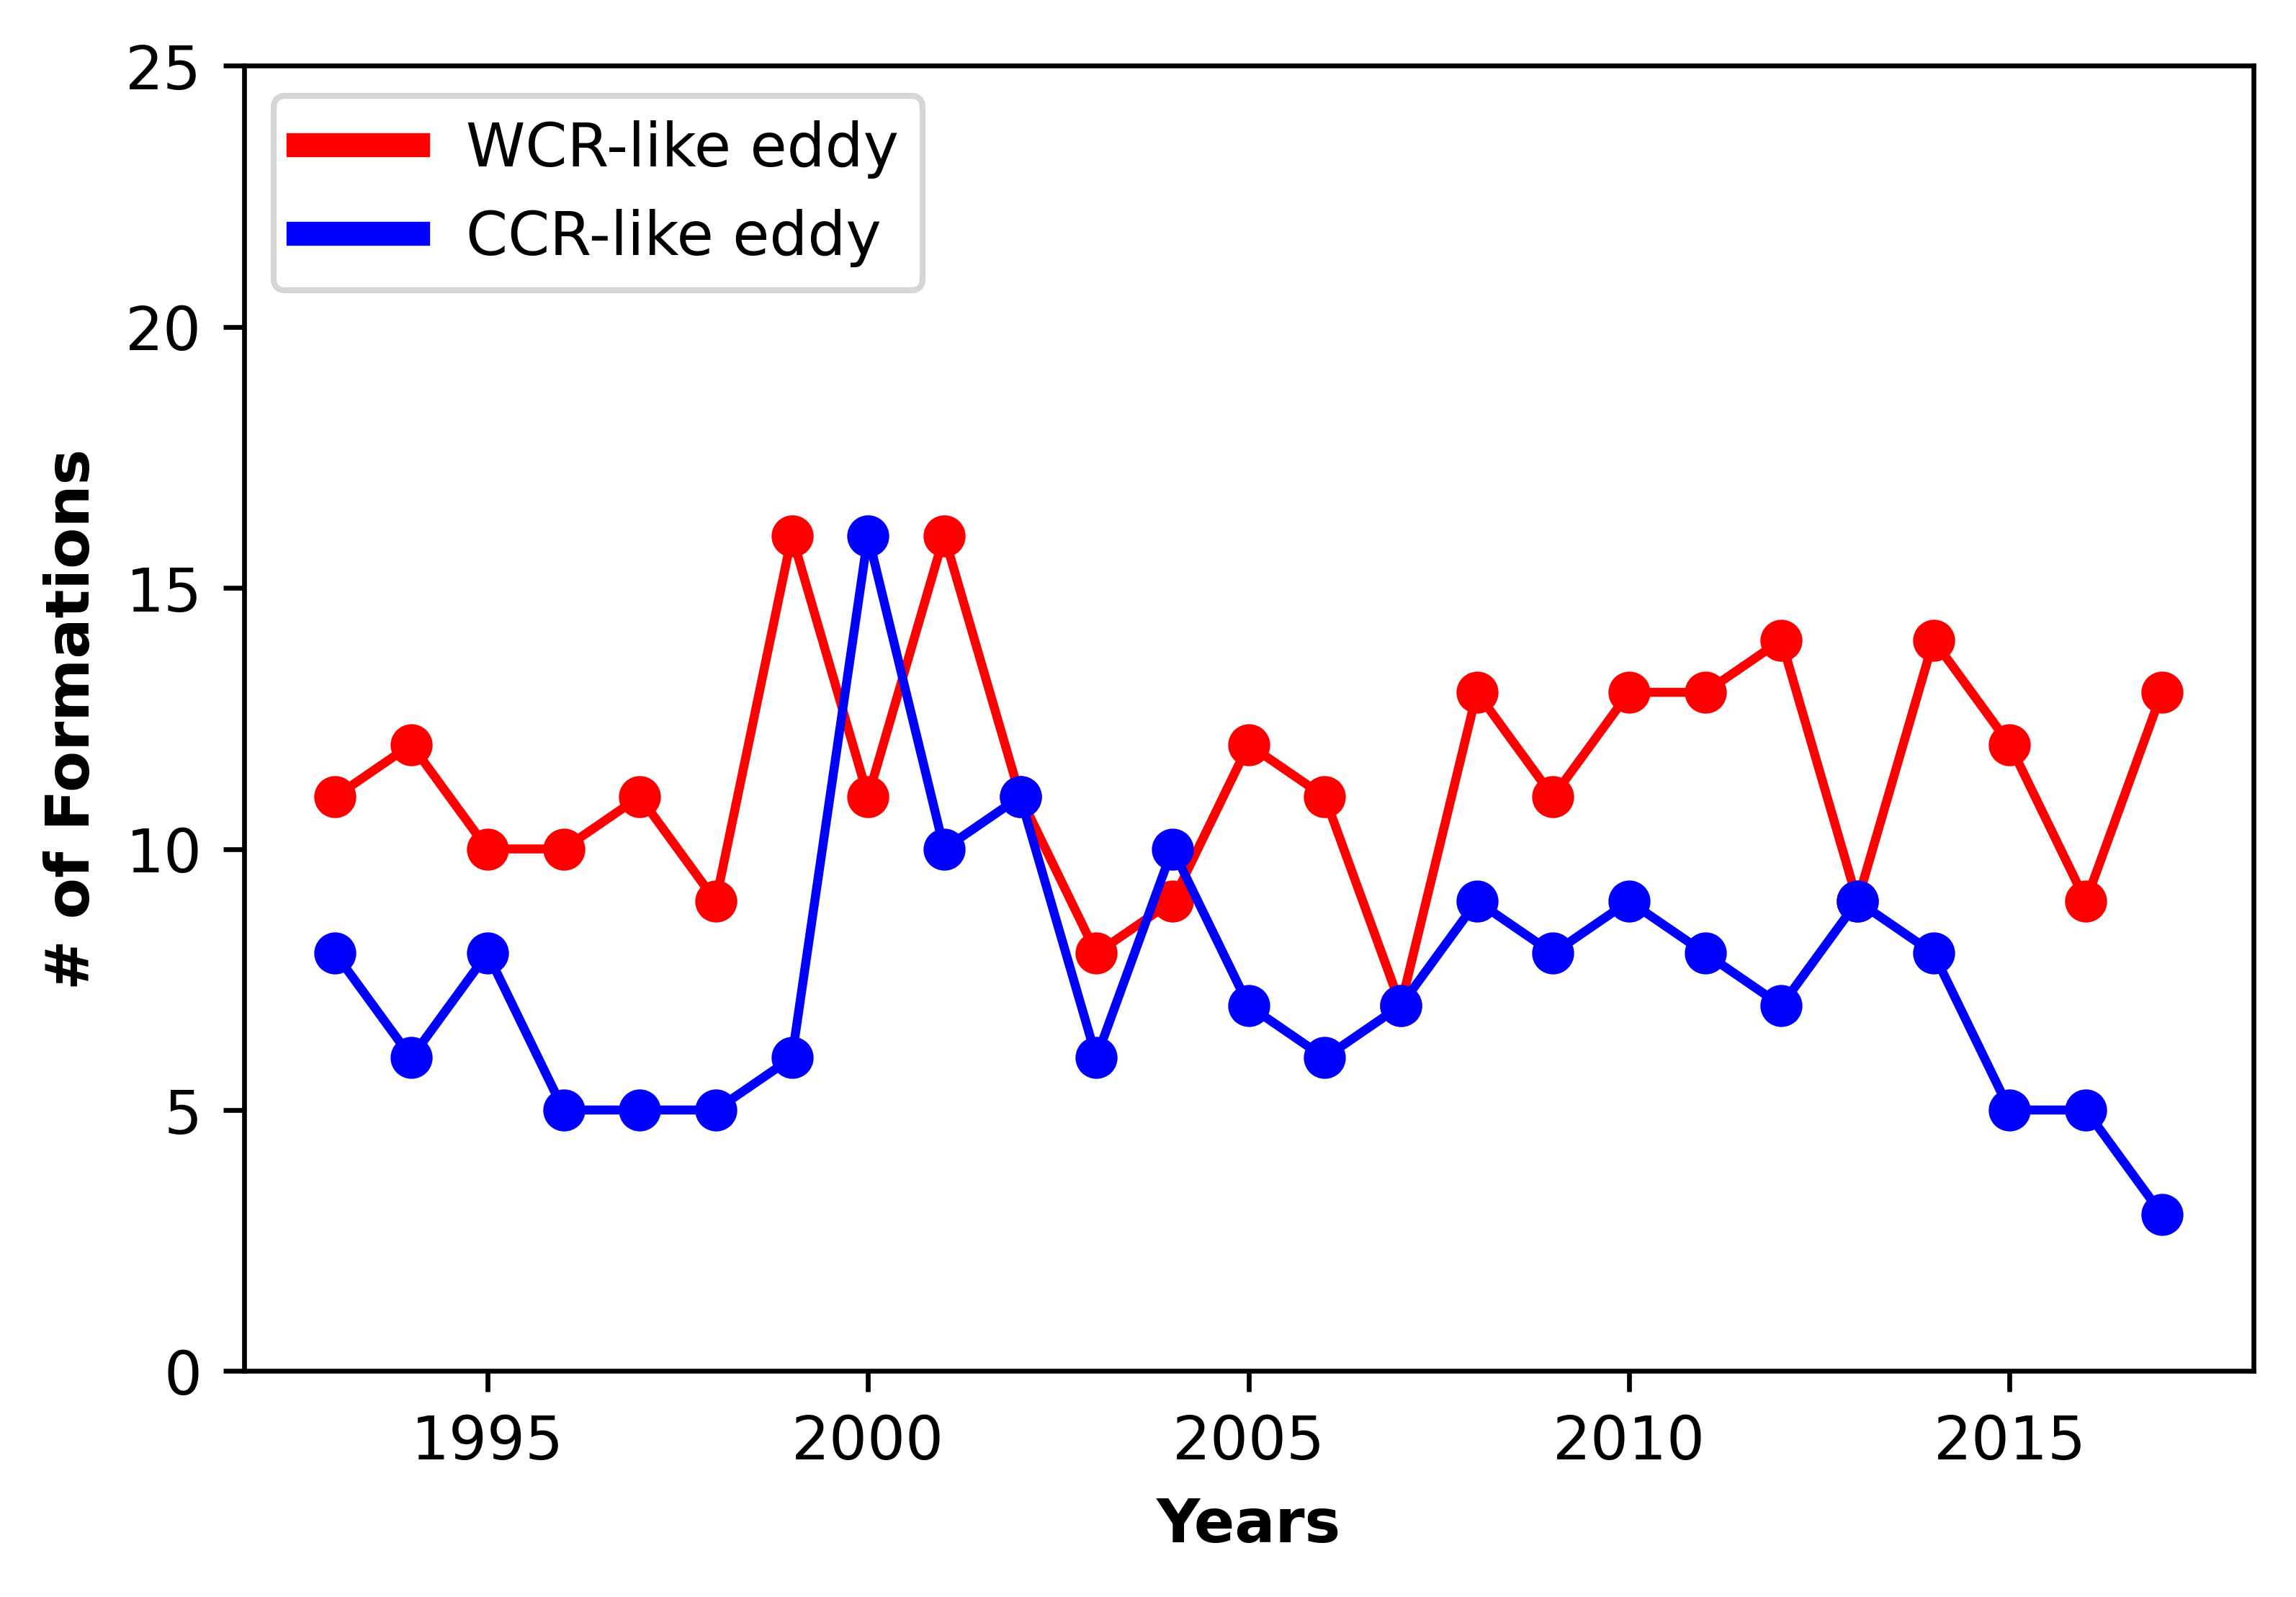

In [16]:
def rings_interannual_variability(ccr_formations_df, wcr_formations_df, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones 
        wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones 
        fig_quality (Int)             : quality of the figure (e.g. 100 dpi) 
        
    Output:
        fig (Figure)                  : returns a time-series of interannual variability of rings
     
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" 
    
    # compute means for pre/post-2000 formations
    min_year_ccr = int(min(ccr_formations_df['year']))
    max_year_ccr = int(max(ccr_formations_df['year']))

    min_year_wcr = int(min(wcr_formations_df['year']))
    max_year_wcr = int(max(wcr_formations_df['year']))

    pre_2000_ccr = ccr_formations_df[ccr_formations_df['year']<2000] # mean rings count pre-2000
    post_2000_ccr = ccr_formations_df[ccr_formations_df['year']>=2000] # mean ring count post-2000

    pre_2000_wcr = wcr_formations_df[wcr_formations_df['year']<2000] # mean rings count pre-2000
    post_2000_wcr = wcr_formations_df[wcr_formations_df['year']>=2000] # mean ring count post-2000

    
    # create figure & axes
    fig,ax = plt.subplots() # figsize=(10,5), for comparison to Fig. 2 Silver et al., 2021
    fig.set_dpi(fig_quality)
#     fig.suptitle('WCR vs. CCR Formations ('+str(int(min(ccr_formations_df['year'])))+' - '+str(int(max(ccr_formations_df['year'])))+')', y=0.935, fontsize=11);

    # anticyclones
    ax.plot(wcr_formations_df['year'],wcr_formations_df['all_zones'],'-o',color='r')
#     ax.plot([min_year_wcr,2000],[pre_2000_wcr['all_zones'].mean(),pre_2000_wcr['all_zones'].mean()], color='r', linestyle='-'); # pre_2000 average
#     ax.plot([2000,max_year_wcr],[post_2000_wcr['all_zones'].mean(),post_2000_wcr['all_zones'].mean()], color='r', linestyle='-'); # post_2000 average

    # cyclones
    ax.plot(ccr_formations_df['year'],ccr_formations_df['all_zones'],'-o',color='b')
#     ax.plot([min_year_ccr,2000],[pre_2000_ccr['all_zones'].mean(),pre_2000_ccr['all_zones'].mean()], color='b', linestyle='-'); # pre_2000 average
#     ax.plot([2000,max_year_ccr],[post_2000_ccr['all_zones'].mean(),post_2000_ccr['all_zones'].mean()], color='b', linestyle='-'); # post_2000 average

    # axes formatting
    ax.set_xlabel('Years',fontweight='bold')
    ax.set_ylabel('# of Formations',fontweight='bold');
    ax.set_ylim(0,25) # 1993-2017
#     ax.set_xlim(1980,2020) # to compare to fig. 2 Silver et al., 2021

    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='r', lw=4), Line2D([0], [0], color='b', lw=4)]
    ax.legend(custom_lines, ['WCR-like eddy', 'CCR-like eddy'], loc='upper left');
    
    return fig,ax

rings_interannual_variability(zone_ccr_annual_formations, zone_wcr_annual_formations, 600);


In [27]:
# regime shift time-series with Clark chart data
rings_interannual_variability(clarkFormationsCounts_ccr, clarkFormationsCounts_wcr, 100);

NameError: name 'clarkFormationsCounts_ccr' is not defined

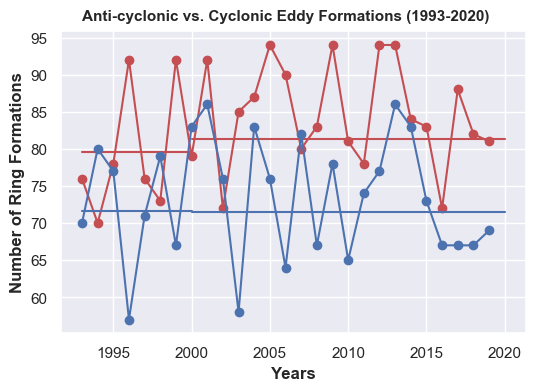

In [29]:
# compare # of annual formations anti-cyclonic vs. cyclonic eddies for the entire period
eddy_interannual_variability(zone_eddies_formations, 100);

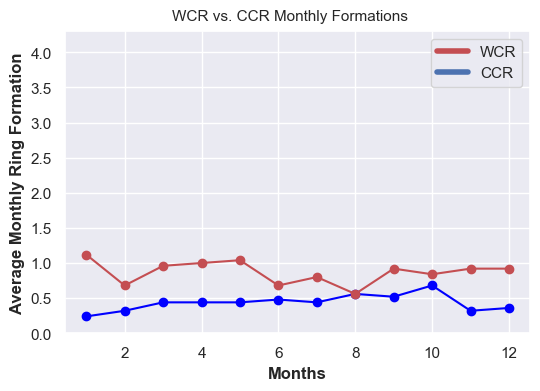

In [36]:
def ring_monthly_formations(ccr_formations_df, wcr_formations_df, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones 
        wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones 
        fig_quality (Int)             : quality of the figure (e.g. 100 dpi) 
        
    Output:
        fig (Figure)                  : returns a time-series of interannual variability of rings
     
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" 
    
    # initialize
    wcr_monthly_std = [] # WCRS
    wcr_monthly_avg = []
    ccr_monthly_std = [] # CCRs
    ccr_monthly_avg = []
    # compute means & std
    for i in np.arange(1,13):
        wcr_monthly_std.append((wcr_formations_df[wcr_formations_df['month']==i]['all_zones']).std())
        ccr_monthly_std.append((ccr_formations_df[ccr_formations_df['month']==i]['all_zones']).std())
        ccr_monthly_avg.append(ccr_formations_df[ccr_formations_df['month']==i]['all_zones'].mean())
        wcr_monthly_avg.append(wcr_formations_df[wcr_formations_df['month']==i]['all_zones'].mean())
        
    # lines
    ccr_minus_std = np.subtract(ccr_monthly_avg,ccr_monthly_std)
    wcr_minus_std = np.subtract(wcr_monthly_avg,wcr_monthly_std)
    ccr_plus_std = np.add(ccr_monthly_avg,ccr_monthly_std)
    wcr_plus_std = np.add(wcr_monthly_avg,wcr_monthly_std)

    fig,ax = plt.subplots()
    fig.set_dpi(fig_quality)
    fig.suptitle('WCR vs. CCR Monthly Formations', y=0.935, fontsize=11);

    # plot all zones mean monthly formations
#     ax.plot(ccr_formations_df['month'],ccr_formations_df['all_zones_mean'],'-o',color='blue')
#     ax.plot(wcr_formations_df['month'],wcr_formations_df['all_zones_mean'],'-o',color='r');
    ax.plot(ccr_formations_df['month'].drop_duplicates(),ccr_monthly_avg,'-o',color='blue');
#     ax.plot(ccr_formations_df['month'].drop_duplicates(),np.subtract(ccr_monthly_avg,ccr_monthly_std),color='blue')
    
    ax.plot(wcr_formations_df['month'].drop_duplicates(),wcr_monthly_avg,'-o',color='r');
    
#     # standard deivation shading
#     # ccrs
#     ax.fill_between(wcr_formations_df['month'].drop_duplicates(), ccr_monthly_avg, ccr_minus_std, alpha=0.3, color='#60BEFA')
#     ax.fill_between(wcr_formations_df['month'].drop_duplicates(), ccr_monthly_avg, ccr_plus_std, alpha=0.3, color='#60BEFA')
#     # wcrs
#     ax.fill_between(wcr_formations_df['month'].drop_duplicates(), wcr_monthly_avg, wcr_minus_std, alpha=0.3, color='#FF938F')
#     ax.fill_between(wcr_formations_df['month'].drop_duplicates(), wcr_monthly_avg, wcr_plus_std, alpha=0.3, color='#FF938F')


    zones = ['zone_1', 'zone_2', 'zone_3', 'zone_4']

#     # plot zones 1-4 mean
#     for z in zones:
#         ax.plot(wcr_formations_df['month'],wcr_formations_df[z+'_mean'],'-o',color='#FF938F')
#         ax.plot(ccr_formations_df['month'],ccr_formations_df[z+'_mean'],'-o',color='#60BEFA')

    # axes formatting
    ax.set_xlabel('Months', fontweight='bold')
    ax.set_ylabel('Average Monthly Ring Formation',fontweight='bold');
#     ax.set_ylim(0,5)

    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='r', lw=4), Line2D([0], [0], color='b', lw=4)]
    ax.legend(custom_lines, ['WCR', 'CCR']);
    
    ax.set_ylim([0,4.3])
    
    return fig,ax

# plot seasonal variability contrasted between WCR and CCR
ring_monthly_formations(zone_ccr_all_formations, zone_wcr_all_formations, 100);

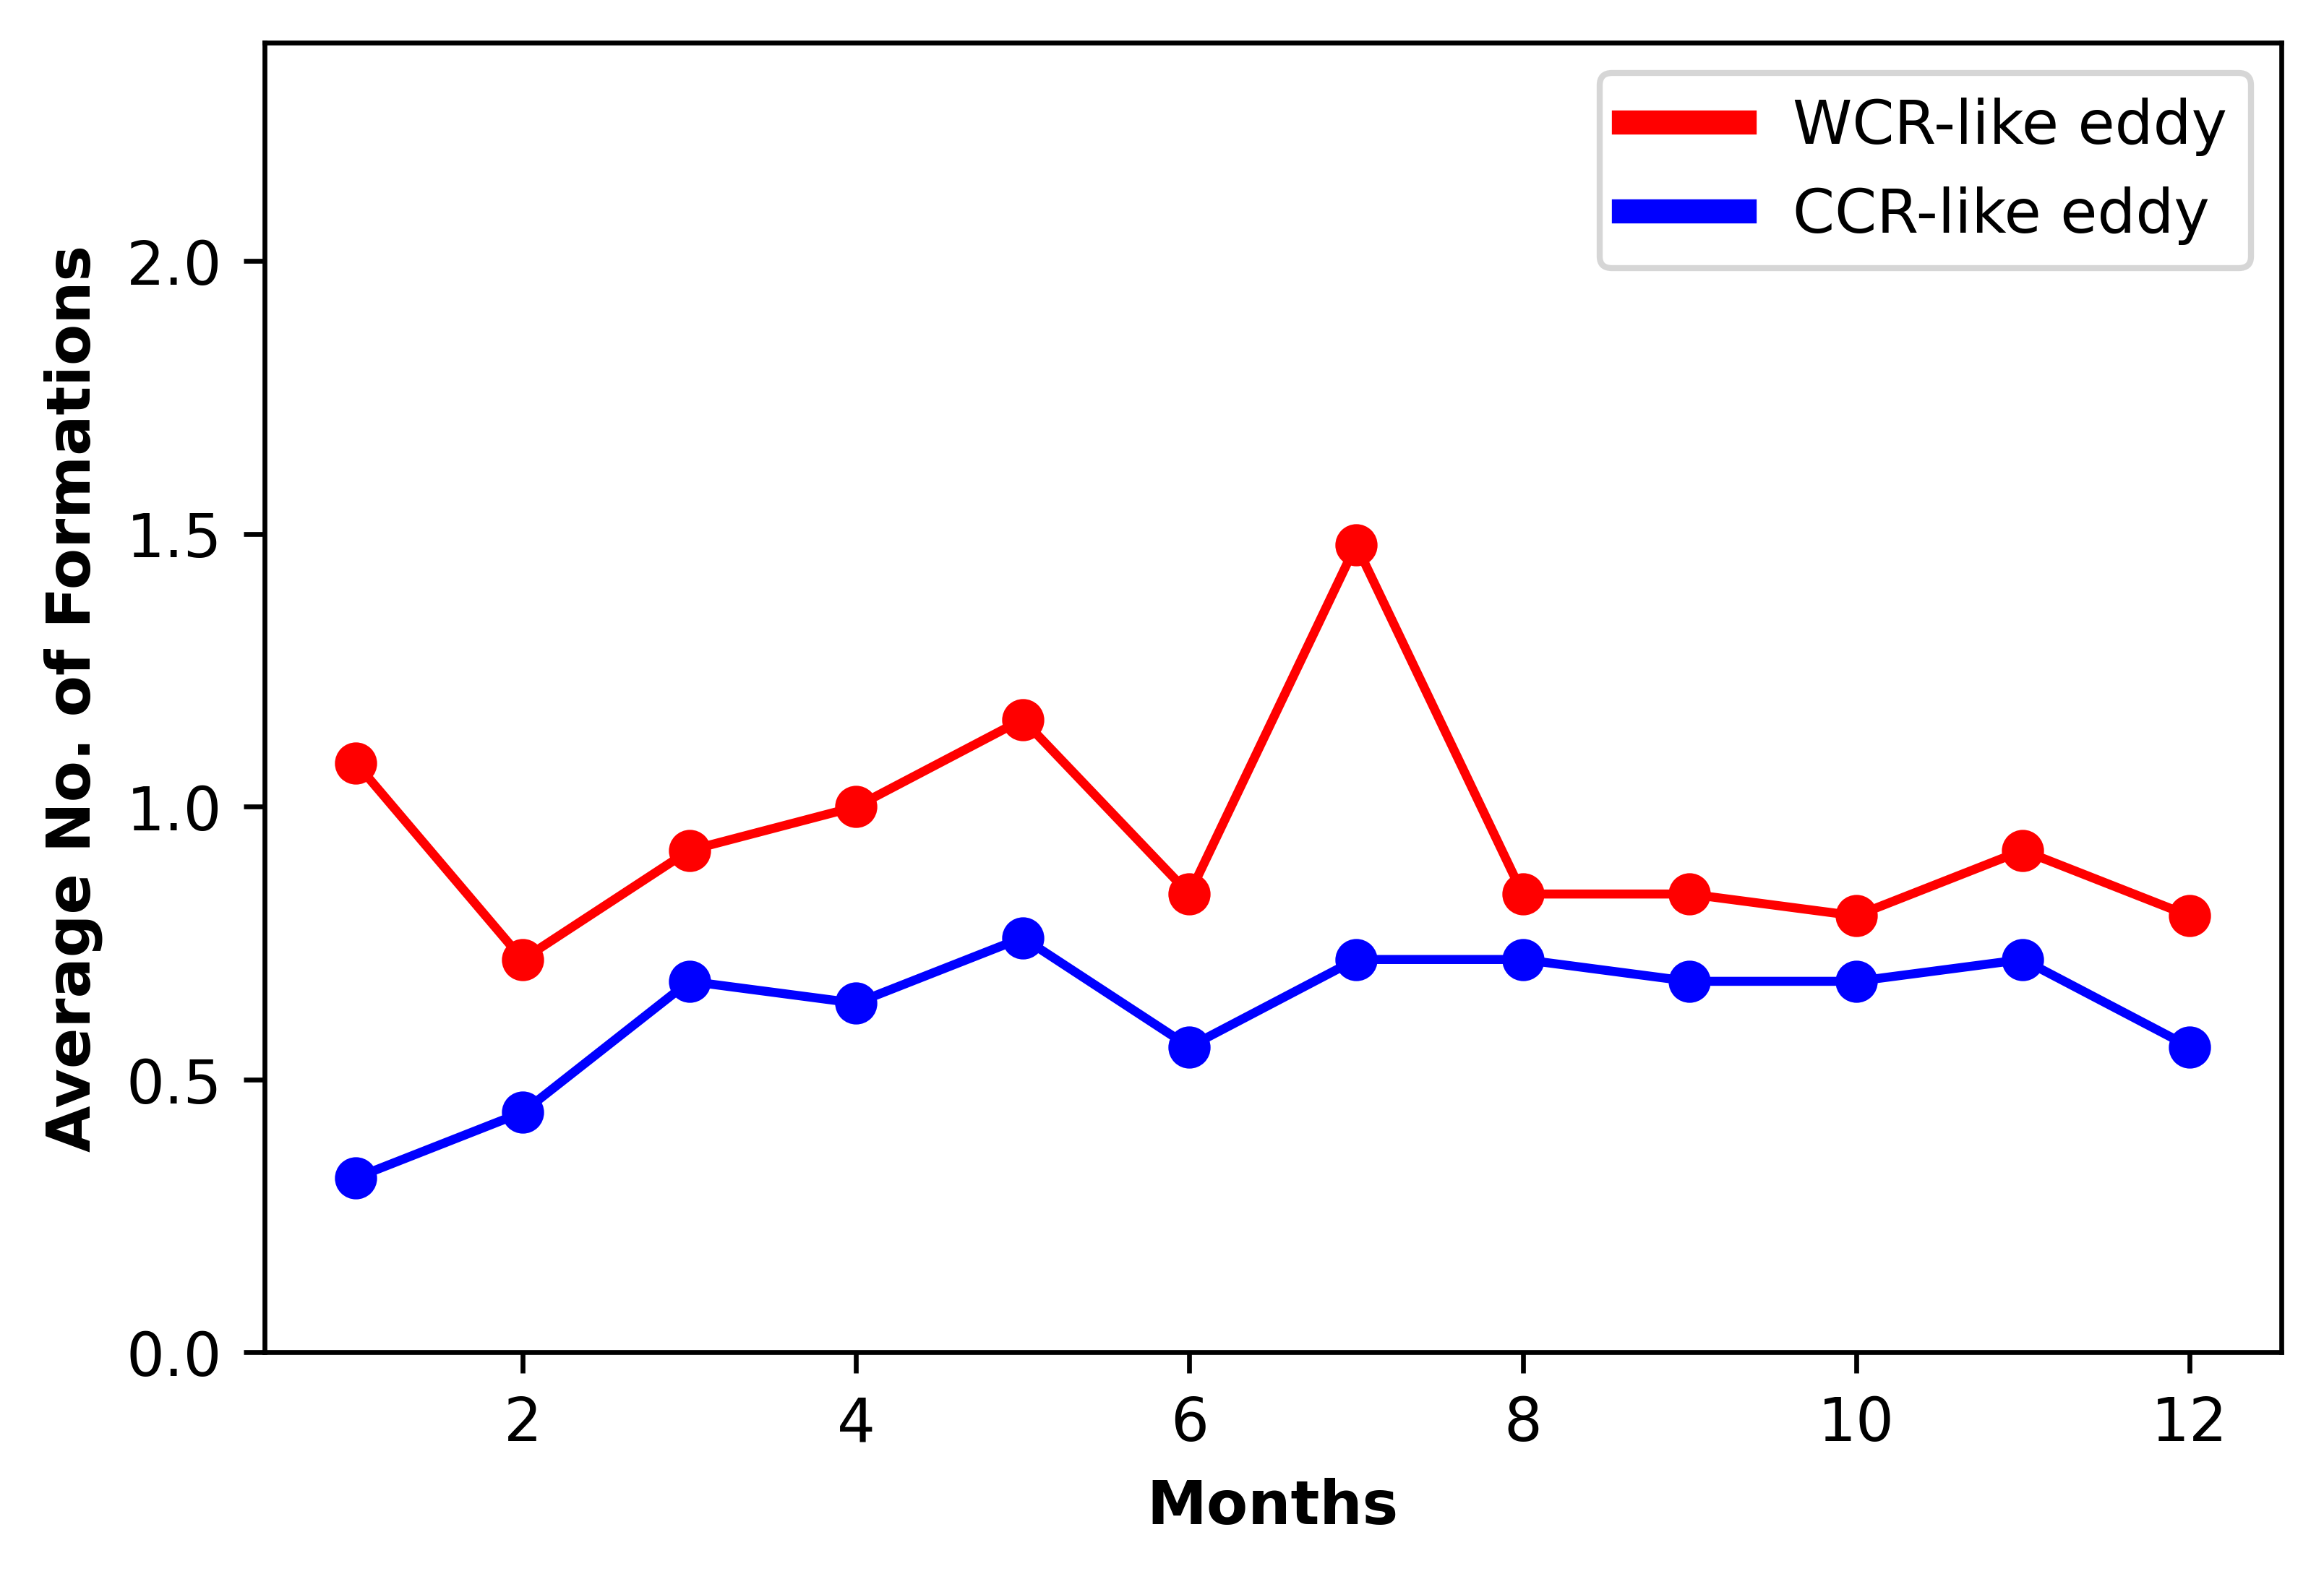

In [14]:
def ring_monthly_formations(ccr_formations_df, wcr_formations_df, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones 
        wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones 
        fig_quality (Int)             : quality of the figure (e.g. 100 dpi) 
        
    Output:
        fig (Figure)                  : returns a time-series of interannual variability of rings
     
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" 
    
    # initialize
    wcr_monthly_std = [] # WCRS
    wcr_monthly_avg = []
    ccr_monthly_std = [] # CCRs
    ccr_monthly_avg = []
    # compute means & std
    for i in np.arange(1,13):
        wcr_monthly_std.append((wcr_formations_df[wcr_formations_df['month']==i]['all_zones']).std())
        ccr_monthly_std.append((ccr_formations_df[ccr_formations_df['month']==i]['all_zones']).std())
        ccr_monthly_avg.append(ccr_formations_df[ccr_formations_df['month']==i]['all_zones'].mean())
        wcr_monthly_avg.append(wcr_formations_df[wcr_formations_df['month']==i]['all_zones'].mean())
        
    # lines
    ccr_minus_std = np.subtract(ccr_monthly_avg,ccr_monthly_std)
    wcr_minus_std = np.subtract(wcr_monthly_avg,wcr_monthly_std)
    ccr_plus_std = np.add(ccr_monthly_avg,ccr_monthly_std)
    wcr_plus_std = np.add(wcr_monthly_avg,wcr_monthly_std)

    fig,ax = plt.subplots()
    fig.set_dpi(fig_quality)
#     fig.suptitle('Chelton WCR-like & CCR-like Feature Monthly Formations (1993-2017) ', y=0.935, fontsize=11);

    # plot all zones mean monthly formations
#     ax.plot(ccr_formations_df['month'],ccr_formations_df['all_zones_mean'],'-o',color='blue')
#     ax.plot(wcr_formations_df['month'],wcr_formations_df['all_zones_mean'],'-o',color='r');
    ax.plot(ccr_formations_df['month'].drop_duplicates(),ccr_monthly_avg,'-o',color='blue');
#     ax.plot(ccr_formations_df['month'].drop_duplicates(),np.subtract(ccr_monthly_avg,ccr_monthly_std),color='blue')
    
    ax.plot(wcr_formations_df['month'].drop_duplicates(),wcr_monthly_avg,'-o',color='r');
    
#     # standard deivation shading
#     # ccrs
#     ax.fill_between(wcr_formations_df['month'].drop_duplicates(), ccr_monthly_avg, ccr_minus_std, alpha=0.3, color='#60BEFA')
#     ax.fill_between(wcr_formations_df['month'].drop_duplicates(), ccr_monthly_avg, ccr_plus_std, alpha=0.3, color='#60BEFA')
#     # wcrs
#     ax.fill_between(wcr_formations_df['month'].drop_duplicates(), wcr_monthly_avg, wcr_minus_std, alpha=0.3, color='#FF938F')
#     ax.fill_between(wcr_formations_df['month'].drop_duplicates(), wcr_monthly_avg, wcr_plus_std, alpha=0.3, color='#FF938F')


    zones = ['zone_1', 'zone_2', 'zone_3', 'zone_4']

#     # plot zones 1-4 mean
#     for z in zones:
#         ax.plot(wcr_formations_df['month'],wcr_formations_df[z+'_mean'],'-o',color='#FF938F')
#         ax.plot(ccr_formations_df['month'],ccr_formations_df[z+'_mean'],'-o',color='#60BEFA')

    # axes formatting
    ax.set_xlabel('Months', fontweight='bold')
    ax.set_ylabel('Average No. of Formations',fontweight='bold');
    ax.set_ylim(0,2.4)

    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='r', lw=4), Line2D([0], [0], color='b', lw=4)]
    ax.legend(custom_lines, ['WCR-like eddy', 'CCR-like eddy']);
    
    return fig,ax

ring_monthly_formations(zone_ccr_all_formations, zone_wcr_all_formations, 600);

In [5]:
zone_ccr_all_formations

year  month  all_zones  zone_1  zone_2  zone_3  zone_4
0    1993.0    1.0        1.0     0.0     0.0     0.0     1.0
1    1993.0    2.0        1.0     0.0     0.0     0.0     1.0
2    1993.0    3.0        1.0     0.0     1.0     0.0     0.0
3    1993.0    4.0        0.0     0.0     0.0     0.0     0.0
4    1993.0    5.0        1.0     0.0     1.0     0.0     0.0
..      ...    ...        ...     ...     ...     ...     ...
295  2017.0    8.0        0.0     0.0     NaN     0.0     NaN
296  2017.0    9.0        0.0     0.0     NaN     0.0     NaN
297  2017.0   10.0        0.0     0.0     NaN     0.0     NaN
298  2017.0   11.0        0.0     0.0     NaN     0.0     NaN
299  2017.0   12.0        0.0     0.0     NaN     0.0     NaN

[300 rows x 7 columns]

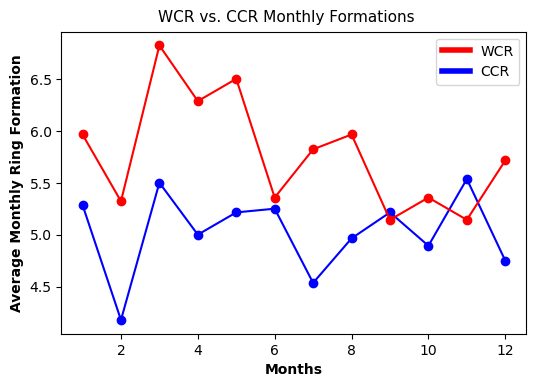

In [3]:
# ACTUALLY EDDIES
# plot seasonal variability contrasted between WCR and CCR
ring_monthly_formations(zone_ceddy_all_formations, zone_aeddy_all_formations, 100);

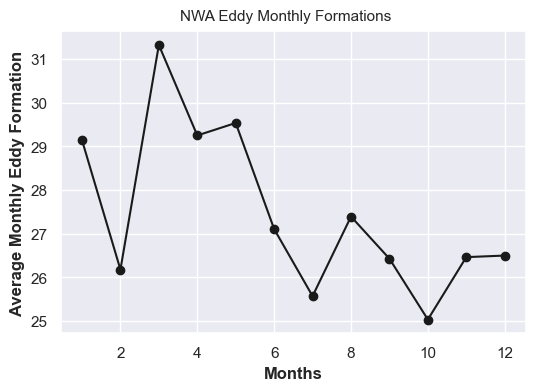

In [38]:
ring_df = nwa_eddies

var = ['month','eddy_formations','mean_eddy_formations']

year_range = np.arange(min(ring_df['time'].dt.year), max(ring_df['time'].dt.year)+1)
month_range = np.arange(1,13)

df_structure = np.zeros((len(month_range), len(var)))
ring_month_count_df = pd.DataFrame(df_structure, columns = var)

counter=0
for month in month_range:
    monthly_avg = len((ring_df[(ring_df['time'].dt.month == month) & (ring_df['observation_number']==0)])['track'].unique())/((year_range[-1]-year_range[0])+1)
    monthly_formations = len((ring_df[(ring_df['time'].dt.month == month) & (ring_df['observation_number']==0)])['track'].unique())
    ring_month_count_df.iloc[counter]=[month, monthly_formations, monthly_avg]
    counter += 1


def eddy_monthly_formations(eddies_df, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones 
        wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones 
        fig_quality (Int)             : quality of the figure (e.g. 100 dpi) 
        
    Output:
        fig (Figure)                  : returns a time-series of interannual variability of rings
     
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" 

    fig,ax = plt.subplots()
    fig.set_dpi(fig_quality)
    fig.suptitle('NWA Eddy Monthly Formations', y=0.935, fontsize=11);

    # plot all zones mean monthly formations
    ax.plot(eddies_df['month'],eddies_df['mean_eddy_formations'],'-o',color='k');


    # axes formatting
    ax.set_xlabel('Months', fontweight='bold')
    ax.set_ylabel('Average Monthly Eddy Formation',fontweight='bold');
#     ax.set_ylim(0,5)
    
    return fig,ax

eddy_monthly_formations(ring_month_count_df, 100);


In [39]:
# # plot seasonal variability by *SPECIFIED* zone to contrast WCR vs. CCR formations by month
# zonal_ring_monthly_formations(zone_ccr_monthly_formations, zone_wcr_monthly_formations, 100, 'zone_4');

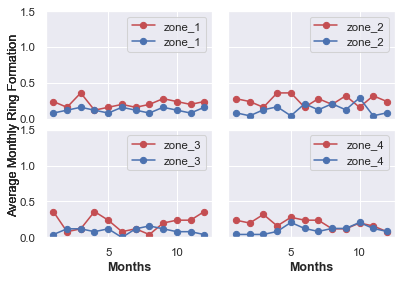

In [40]:
# plots seasonal variability of formations by zones for WCRs and CCRs
ring_seasonal_var_by_zone(zone_ccr_monthly_formations, zone_wcr_monthly_formations, 75);

In [5]:
# histogram of CCR seasonal variability/frequency 
# hist_ring_forms_by_month(zone_ccr_all_formations,'Histograms of CCR Formation Distribution','ccr', 25);

In [6]:
# histogram of WCR seasonal variability/frequency 
# hist_ring_forms_by_month(zone_wcr_all_formations,'Histograms of WCR Formation Distribution','wcr', 25);

In [43]:
## QUANTILES
# quantiles are another way of looking at the distribution of data. can be especially helpful when the data
# does *not* have a normal distribution

q = [1-0.997,1-0.954,1-0.68,0.5,0.68,0.954,0.997]
month = 7 
ring_df = zone_wcr_all_formations[zone_wcr_all_formations['month']==month]['all_zones']
np.quantile(ring_df,q)

array([0., 0., 0., 1., 1., 2., 2.])

In [44]:
## STD
# standard deviation to compare to the quantiles. Std is better idea of data distribution for data with
# normal distribution
month = 7 
ring_df = zone_wcr_all_formations[zone_wcr_all_formations['month']==month]['all_zones']
ring_df.std()
# ring_df.mean()

0.7071067811865475

### Map plots:

In [45]:
# # map of the zone eddies in a given year
# eddy_filt_map_year(zone_eddies, bathy, 2000, ' Eddy Tracks ', 100);

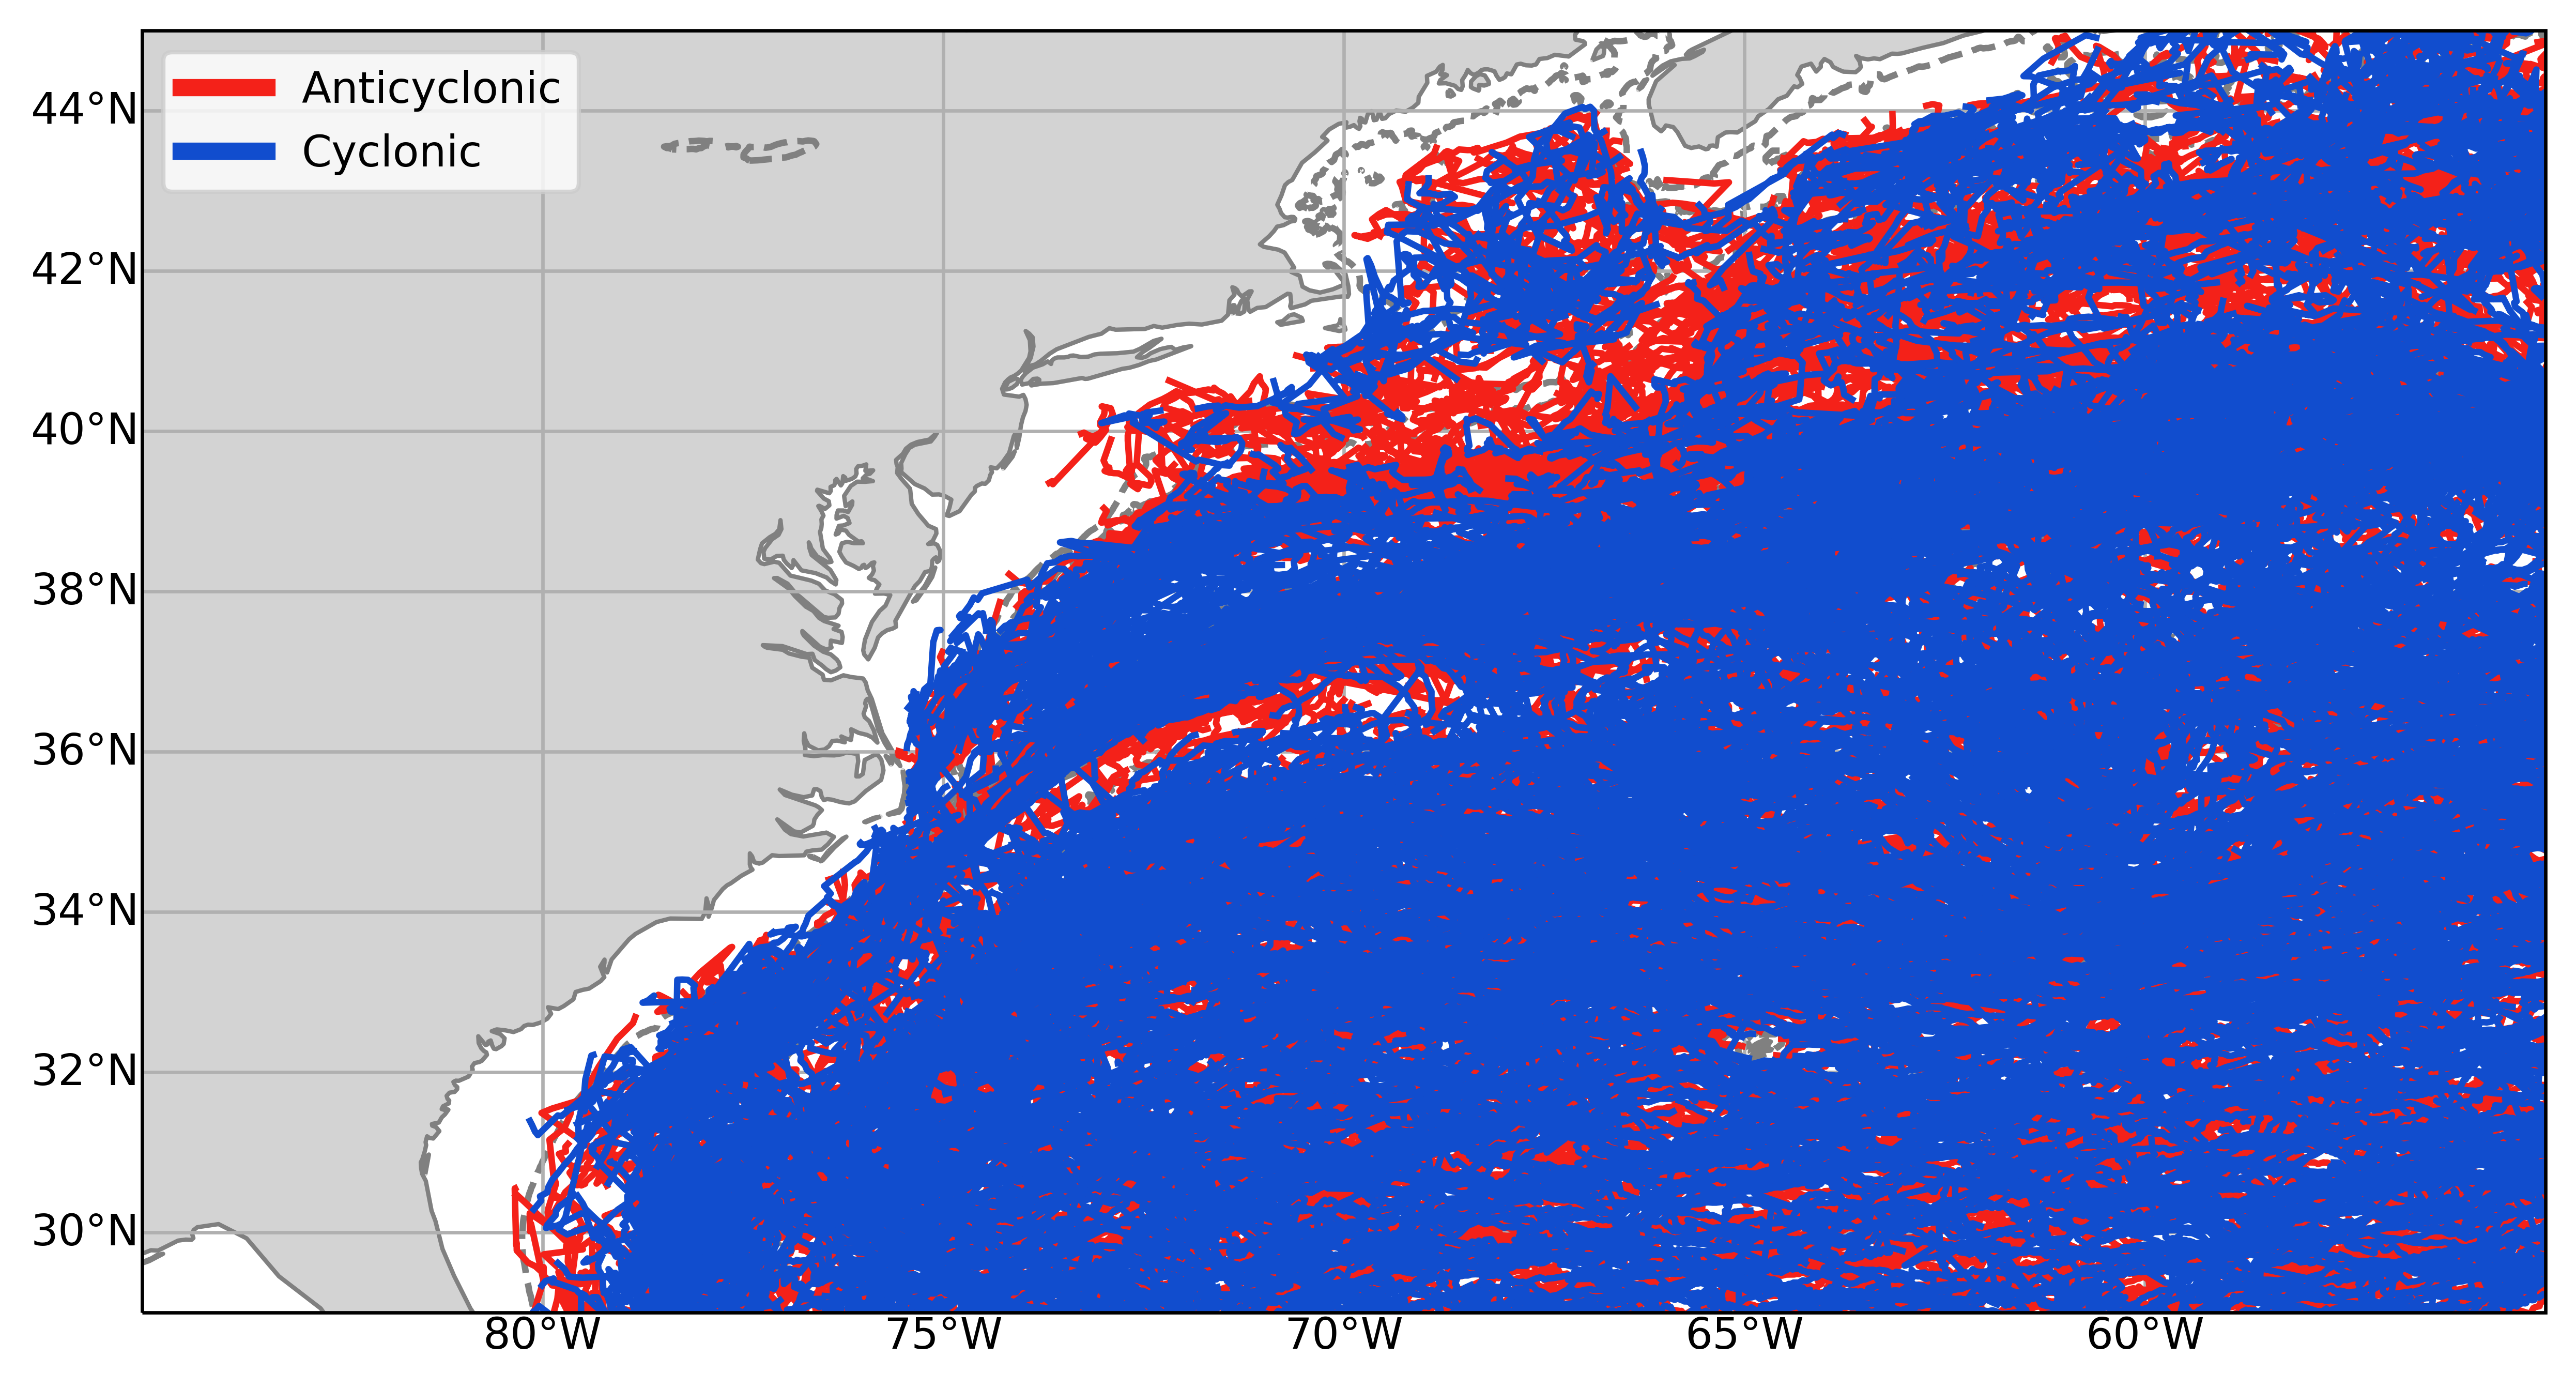

In [11]:
# #  creates a map of EDDY tracks for all years in the northwest atlantic
def eddy_filt_map_zones(eddy_df, bathy, title, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        wcr_df (DataFrame)  : pandas dataframe of warm core rings
        ccr_df (DataFrame)  : pandas dataframe of cold core rings
        bathy (xarray)      : dataarray of northwest atlantic bathymetry 
        title (String)      : title of the figure
        fig_quality (Int)   : quality of the figure (e.g. 100 dpi) 
    
    Output:
        fig (Figure)        : returns map of eddy tracks for all years

    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # gangopadhyay census bounds
    x_bnds = [-85,-55] # lon, NWA: [-82,-48]
    y_bnds = [29,45] # lat, NWA: [24,53]

    proj = ccrs.PlateCarree()

    # create figure 
    fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
    fig.set_dpi(fig_quality)
#     fig.suptitle(title, fontsize=25, y=0.875)
    
    # colors for lines
    colors = sns.color_palette("hls", 12)
    monthColors = ['#9ecae1','#4393c3','#2166ac','#8c510a','#bf812d','#f46d43','#d73027','#971700','#fddbc7','#d9f0d3','#5aae61','#1FC1F2']
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    # plot gs path for all years
    for year in (np.arange(1993,2018)):
        ax.plot(get_gs_year(year)[0],get_gs_year(year)[1],label=year, color='gray', linewidth=2);
    
    # add zone lines
    ax.plot([-75,29],[-75,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 1
    
    ## anti-cyclonic ##
    for i in np.array(eddy_df['track'].unique()):
        eddy = eddy_df[eddy_df['track']==i]        
        if (eddy['cyclonic_type']==1).all(): # if anti-cyclonic & north of the gulf stream
            ax.plot(eddy['longitude'],eddy['latitude'],color='#F42119')
        elif (eddy['cyclonic_type']==-1).all():
            ax.plot(eddy['longitude'],eddy['latitude'],color='#114DCE') #cyclonic

       
    # axes formatting
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
    ax.coastlines(resolution='50m',color='gray')
    ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='lightgray')  
    
    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='#F42119', lw=4), Line2D([0], [0], color='#114DCE', lw=4)]
    ax.legend(custom_lines, ['Anticyclonic', 'Cyclonic'])

    # gridlines
    gl = ax.gridlines(crs=proj,draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.yformatter = LATITUDE_FORMATTER
    gl.xformatter = LONGITUDE_FORMATTER
    
    return fig,ax

eddy_filt_map_zones(nwa_eddies, bathy, 'NWA Eddy Tracks (1993-2017)', 600);

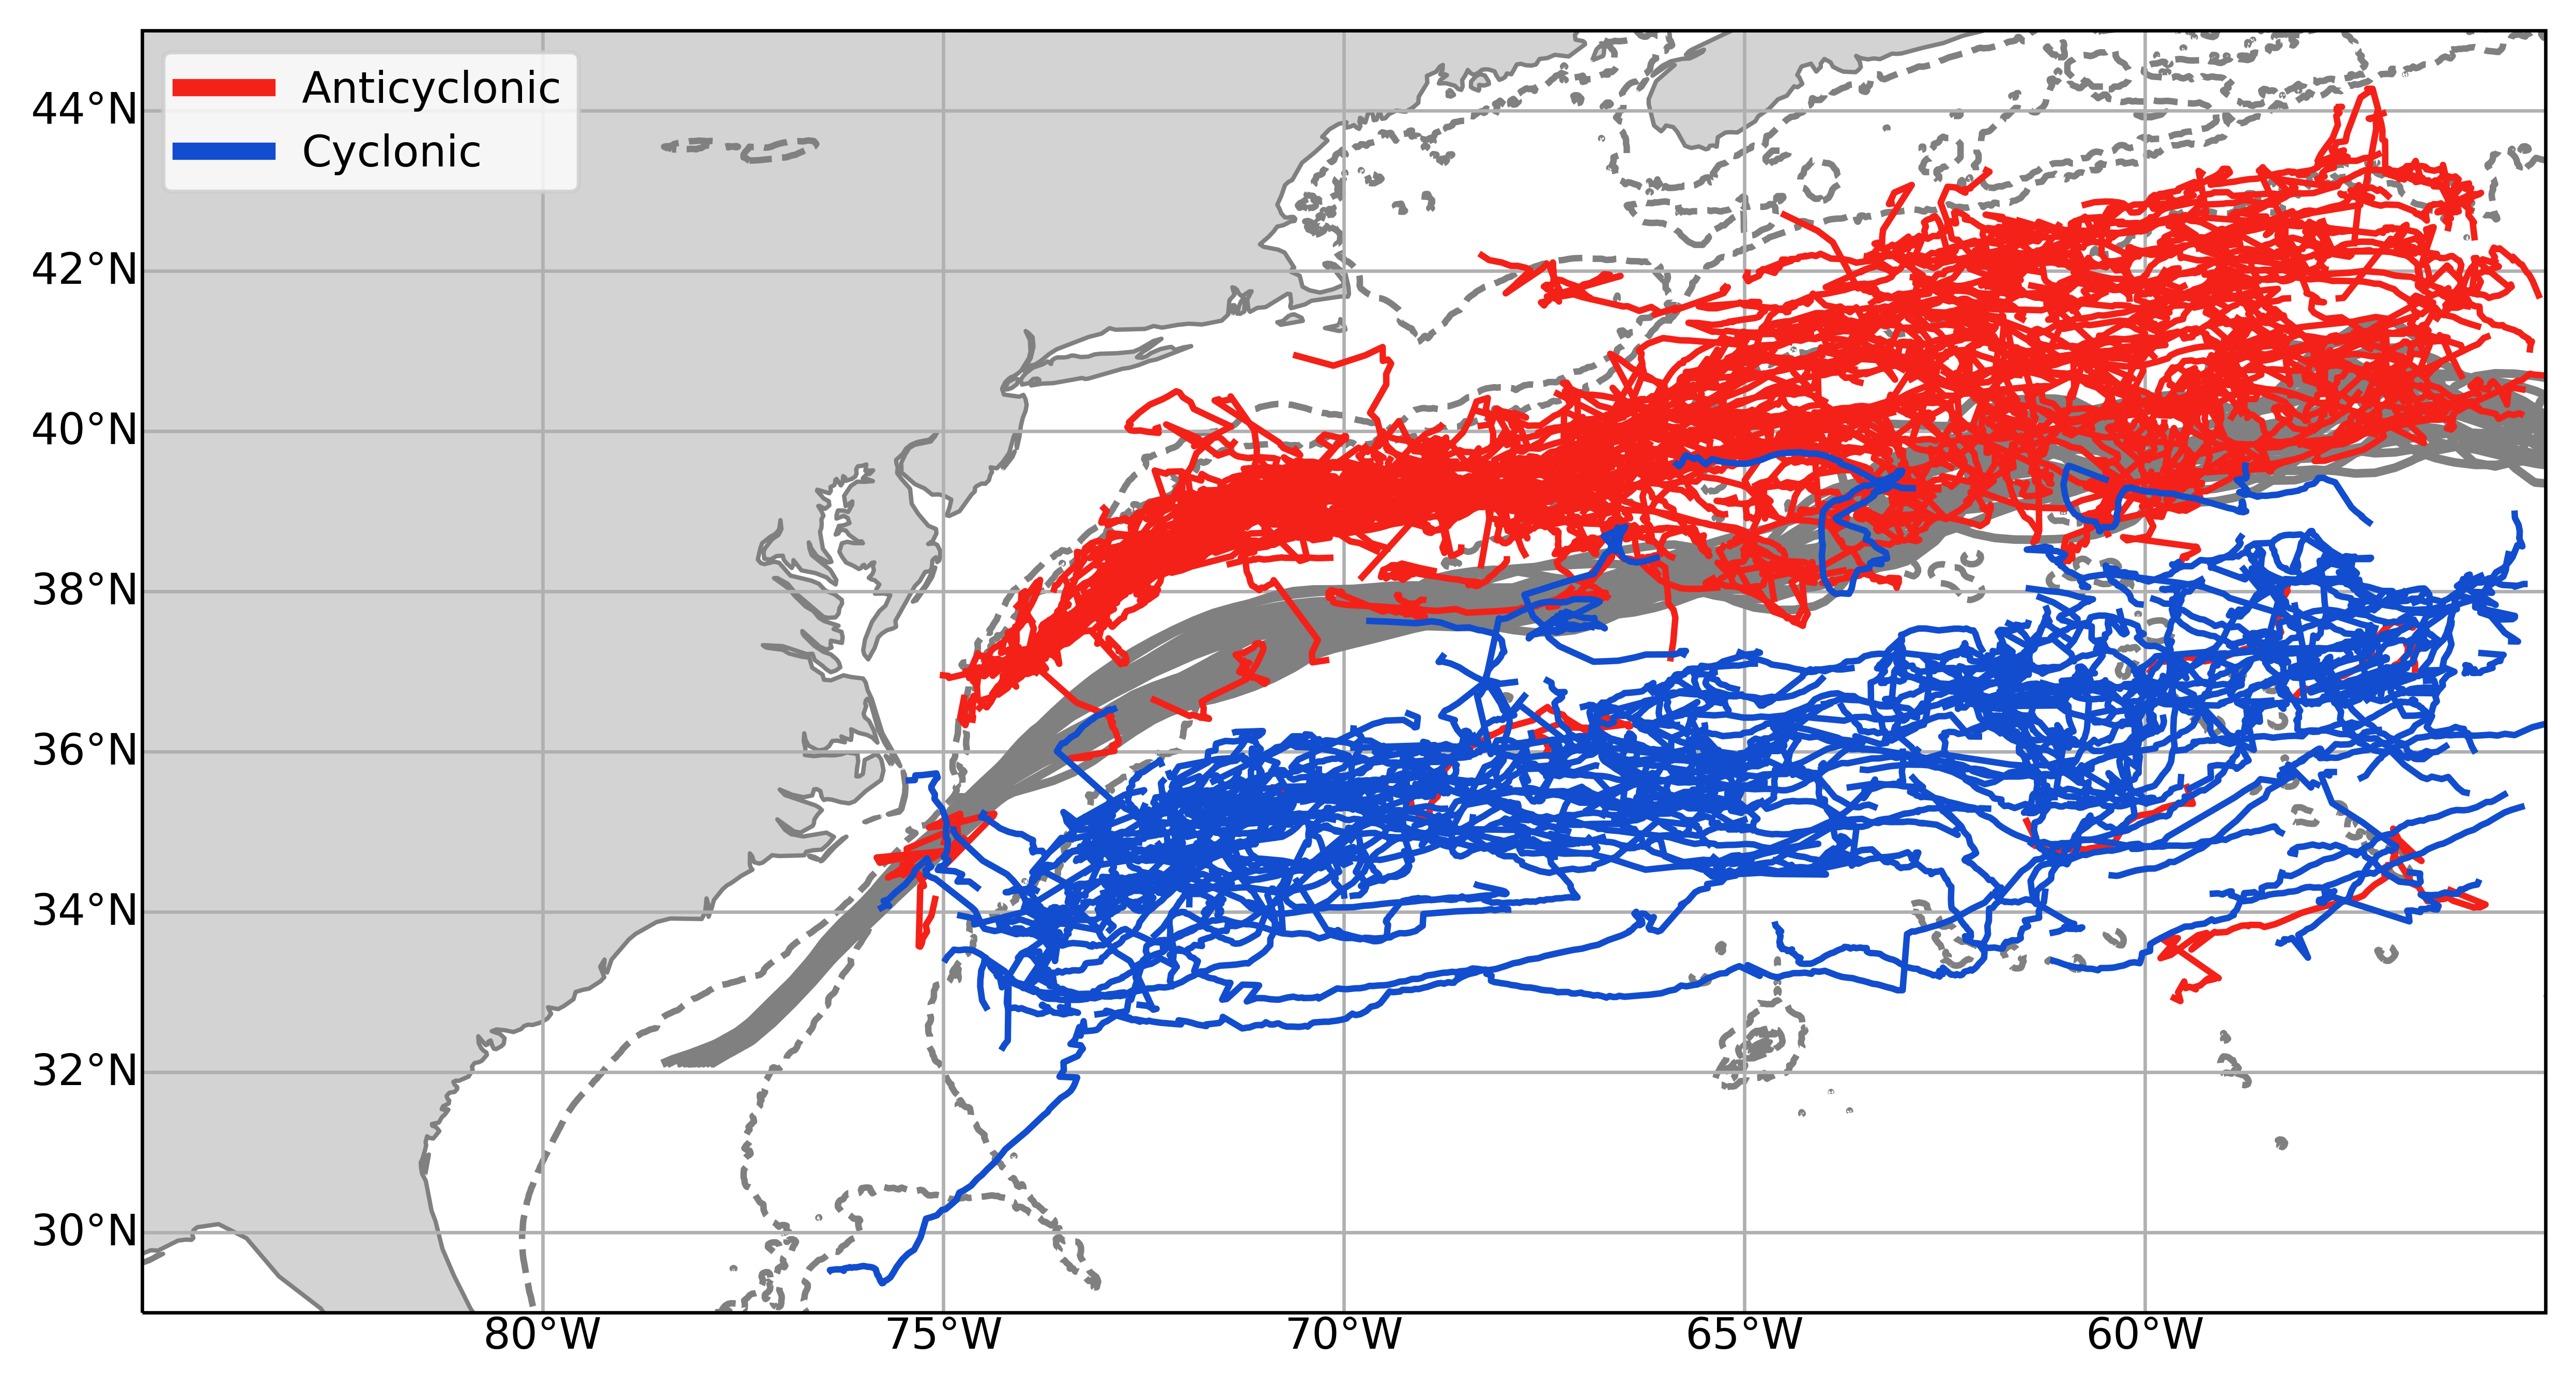

In [12]:
# #  creates a map of EDDY tracks for all years in the northwest atlantic
def eddy_filt_map_zones(eddy_wcr_df, eddy_ccr_df, bathy, title, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        wcr_df (DataFrame)  : pandas dataframe of warm core rings
        ccr_df (DataFrame)  : pandas dataframe of cold core rings
        bathy (xarray)      : dataarray of northwest atlantic bathymetry 
        title (String)      : title of the figure
        fig_quality (Int)   : quality of the figure (e.g. 100 dpi) 
    
    Output:
        fig (Figure)        : returns map of eddy tracks for all years

    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # gangopadhyay census bounds
    x_bnds = [-85,-55] # lon, NWA: [-82,-48]
    y_bnds = [29,45] # lat, NWA: [24,53]

    proj = ccrs.PlateCarree()

    # create figure 
    fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
    fig.set_dpi(fig_quality)
#     fig.suptitle(title, fontsize=25, y=0.875)
    
    # colors for lines
    colors = sns.color_palette("hls", 12)
    monthColors = ['#9ecae1','#4393c3','#2166ac','#8c510a','#bf812d','#f46d43','#d73027','#971700','#fddbc7','#d9f0d3','#5aae61','#1FC1F2']
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    # plot gs path for all years
    for year in (np.arange(1993,2018)):
        ax.plot(get_gs_year(year)[0],get_gs_year(year)[1],label=year, color='gray', linewidth=2);
    
    # add zone lines
    ax.plot([-75,29],[-75,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 1
    
    ## anti-cyclonic ##
    for i in np.array(eddy_wcr_df['track'].unique()):
        eddy = eddy_wcr_df[eddy_wcr_df['track']==i]        
        if (eddy['cyclonic_type']==1).all(): # if anti-cyclonic & north of the gulf stream
            ax.plot(eddy['longitude'],eddy['latitude'],color='#F42119')
    
    ## cyclonic ##
    for i in np.array(eddy_ccr_df['track'].unique()):
        eddy = eddy_ccr_df[eddy_ccr_df['track']==i]     
        if (eddy['cyclonic_type']==-1).all():
            ax.plot(eddy['longitude'],eddy['latitude'],color='#114DCE') #cyclonic

       
    # axes formatting
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
    ax.coastlines(resolution='50m',color='gray')
    ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='lightgray')  
    
    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='#F42119', lw=4), Line2D([0], [0], color='#114DCE', lw=4)]
    ax.legend(custom_lines, ['Anticyclonic', 'Cyclonic'])

    # gridlines
    gl = ax.gridlines(crs=proj,draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.yformatter = LATITUDE_FORMATTER
    gl.xformatter = LONGITUDE_FORMATTER
    
    return fig,ax

eddy_filt_map_zones(zone_wcrs, zone_ccrs, bathy, 'NWA Eddy Tracks (1993-2017)', 600);

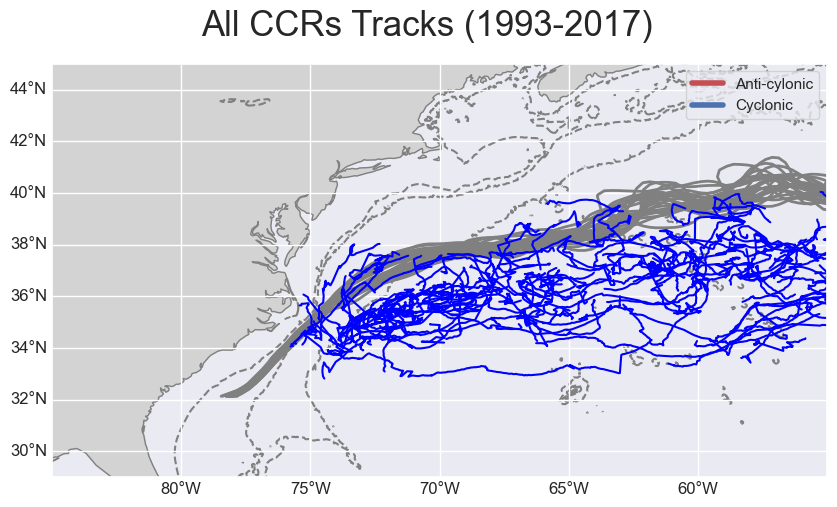

In [47]:
# # just cyclonic eddies
eddy_filt_map_zones(nwa_ccr_day_df, bathy, 'All CCRs Tracks (1993-2017)', 100);

In [48]:
# # creates a map of ring tracks for all years in the northwest atlantic
# ring_filt_map_zones(zone_wcrs, zone_ccrs, bathy, 'Ring Tracks (1993-2017)', 100);

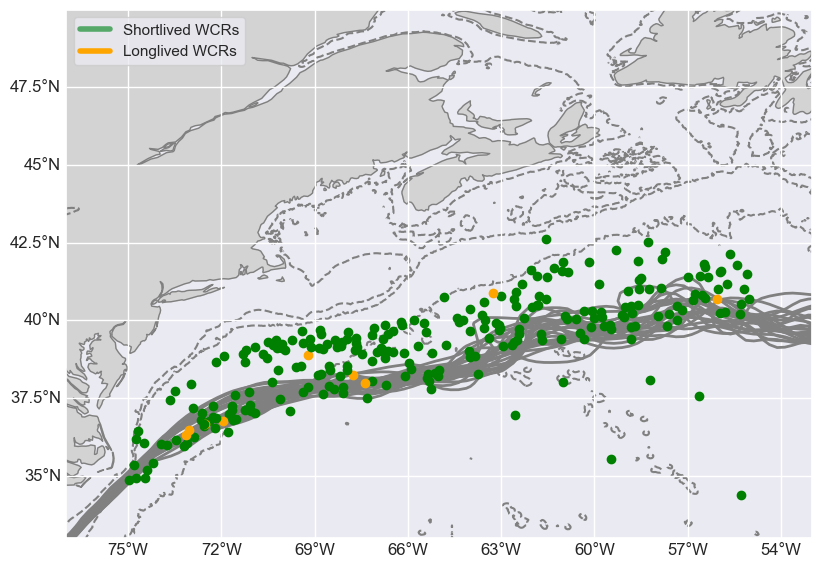

In [49]:
def formation_filt_map_zones(wcr_df, ccr_df, bathy, title, ring_type, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        wcr_df (DataFrame)  : pandas dataframe of warm core rings
        ccr_df (DataFrame)  : pandas dataframe of cold core rings
        bathy (xarray)      : dataarray of northwest atlantic bathymetry 
        title (String)      : title of the figure
        ring_type (String)  : 'ccr' for CCRs, 'wcr' for WCRs, and 'all' for both
        fig_quality (Int)   : quality of the figure (e.g. 100 dpi) 
    
    Output:
        fig (Figure)        : returns map of eddy tracks for all years

    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    # gangopadhyay census bounds
    x_bnds = [-77,-53] # lon, NWA: [-82,-48]
    y_bnds = [33,50] # lat, NWA: [24,53]

    proj = ccrs.PlateCarree()

    # create figure 
    fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
    fig.set_dpi(fig_quality)
#     fig.suptitle(ring_type+title, fontsize=25, y=0.875)
    
    # colors for lines
    colors = sns.color_palette("hls", 12)
    monthColors = ['#9ecae1','#4393c3','#2166ac','#8c510a','#bf812d','#f46d43','#d73027','#971700','#fddbc7','#d9f0d3','#5aae61','#1FC1F2']
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    # plot gs path for all years
    for year in (np.arange(1993,2018)):
        ax.plot(get_gs_year(year)[0],get_gs_year(year)[1],label=year, color='gray', linewidth=2);
    
    # add zone lines
    ax.plot([-75,29],[-75,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 1
    ax.plot([-70,29],[-70,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 2
    ax.plot([-65,29],[-65,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 3
    ax.plot([-60,29],[-60,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4
#     ax.plot([-55,29],[-55,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4.5

    if (ring_type=='wcr') or (ring_type=='all'):
        ## WCRs ##
        for i in np.array(wcr_df['track'].unique()):
            eddy = wcr_df[wcr_df['track']==i]
    #         # track
    #         ax.plot(eddy['longitude'],eddy['latitude'],color='red')

            eddy_lifespan = get_eddy_lifespan(eddy)

    #         # formation
            if (eddy_lifespan <= 150):
                ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='green',marker='o',label='Longlived Rings')
            else:
                ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='orange',marker='o',label='Longlived Rings')

    #         # demise    
    #         if (eddy_lifespan <= 150):
    #             ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='green',marker='o',label='Longlived Rings')
    #         else:
    #             ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='orange',marker='o',label='Longlived Rings')
     
    if (ring_type=='ccr') or (ring_type=='all'):
        ## CCRs ##
        for i in np.array(ccr_df['track'].unique()):
            eddy = ccr_df[ccr_df['track']==i]
    #         # track
    #         ax.plot(eddy['longitude'],eddy['latitude'],color='blue')

            eddy_lifespan = get_eddy_lifespan(eddy)

    #         # formation
            if (eddy_lifespan <= 150):
                ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='green',marker='o',label='Longlived Rings')
            else:
                ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='orange',marker='o',label='Longlived Rings')

    #         # demise    
    #         if (eddy_lifespan <= 150):
    #             ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='green',marker='o',label='Longlived Rings')
    #         else:
    #             ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='orange',marker='o',label='Longlived Rings')
            

       
    # axes formatting
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
    ax.coastlines(resolution='50m',color='gray')
    ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='lightgray')  
    
    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='g', lw=4), Line2D([0], [0], color='orange', lw=4)]
    ax.legend(custom_lines, ['Shortlived WCRs', 'Longlived WCRs'],loc='upper left')
#     ax.legend()

    # gridlines
    gl = ax.gridlines(crs=proj,draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.yformatter = LATITUDE_FORMATTER
    gl.xformatter = LONGITUDE_FORMATTER
    
    return fig,ax

# # map of formation locations for rings
formation_filt_map_zones(zone_wcrs, zone_ccrs, bathy, ' Formation Locations (1993-2017)','wcr', 100);

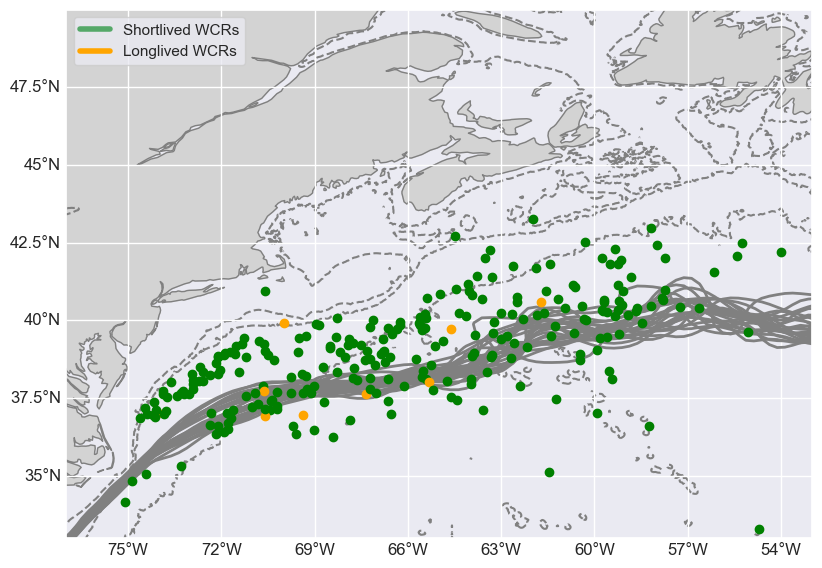

In [50]:
def demise_filt_map_zones(wcr_df, ccr_df, bathy, title, ring_type, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        wcr_df (DataFrame)  : pandas dataframe of warm core rings
        ccr_df (DataFrame)  : pandas dataframe of cold core rings
        bathy (xarray)      : dataarray of northwest atlantic bathymetry 
        title (String)      : title of the figure
        ring_type (String)  : 'ccr' for CCRs, 'wcr' for WCRs, and 'all' for both
        fig_quality (Int)   : quality of the figure (e.g. 100 dpi) 
    
    Output:
        fig (Figure)        : returns map of eddy tracks for all years

    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    # gangopadhyay census bounds
    x_bnds = [-77,-53] # lon, NWA: [-82,-48]
    y_bnds = [33,50] # lat, NWA: [24,53]

    proj = ccrs.PlateCarree()

    # create figure 
    fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
    fig.set_dpi(fig_quality)
#     fig.suptitle(ring_type+title, fontsize=25, y=0.875)
    
    # colors for lines
    colors = sns.color_palette("hls", 12)
    monthColors = ['#9ecae1','#4393c3','#2166ac','#8c510a','#bf812d','#f46d43','#d73027','#971700','#fddbc7','#d9f0d3','#5aae61','#1FC1F2']
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    # plot gs path for all years
    for year in (np.arange(1993,2018)):
        ax.plot(get_gs_year(year)[0],get_gs_year(year)[1],label=year, color='gray', linewidth=2);
    
    # add zone lines
    ax.plot([-75,29],[-75,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 1
    ax.plot([-70,29],[-70,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 2
    ax.plot([-65,29],[-65,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 3
    ax.plot([-60,29],[-60,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4
#     ax.plot([-55,29],[-55,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4.5

    if (ring_type=='wcr') or (ring_type=='all'):
        ## WCRs ##
        for i in np.array(wcr_df['track'].unique()):
            eddy = wcr_df[wcr_df['track']==i]
    #         # track
    #         ax.plot(eddy['longitude'],eddy['latitude'],color='red')

            eddy_lifespan = get_eddy_lifespan(eddy)

#     #         # formation
#             if (eddy_lifespan <= 150):
#                 ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='green',marker='o',label='Longlived Rings')
#             else:
#                 ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='orange',marker='o',label='Longlived Rings')

            # demise    
            if (eddy_lifespan <= 150):
                ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='green',marker='o',label='Longlived Rings')
            else:
                ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='orange',marker='o',label='Longlived Rings')
     
    if (ring_type=='ccr') or (ring_type=='all'):
        ## CCRs ##
        for i in np.array(ccr_df['track'].unique()):
            eddy = ccr_df[ccr_df['track']==i]
    #         # track
    #         ax.plot(eddy['longitude'],eddy['latitude'],color='blue')

            eddy_lifespan = get_eddy_lifespan(eddy)

#     #         # formation
#             if (eddy_lifespan <= 150):
#                 ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='green',marker='o',label='Longlived Rings')
#             else:
#                 ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='orange',marker='o',label='Longlived Rings')

            # demise    
            if (eddy_lifespan <= 150):
                ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='green',marker='o',label='Longlived Rings')
            else:
                ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='orange',marker='o',label='Longlived Rings')      
    
    
    # axes formatting
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
    ax.coastlines(resolution='50m',color='gray')
    ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='lightgray')  
    
    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='g', lw=4), Line2D([0], [0], color='orange', lw=4)]
    ax.legend(custom_lines, ['Shortlived WCRs', 'Longlived WCRs'],loc='upper left')
#     ax.legend()

    # gridlines
    gl = ax.gridlines(crs=proj,draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.yformatter = LATITUDE_FORMATTER
    gl.xformatter = LONGITUDE_FORMATTER
    
    return fig,ax

# # map of demise locations for all rings 
demise_filt_map_zones(zone_wcrs, zone_ccrs, bathy, ' Demise Locations (1993-2017)', 'wcr', 100);

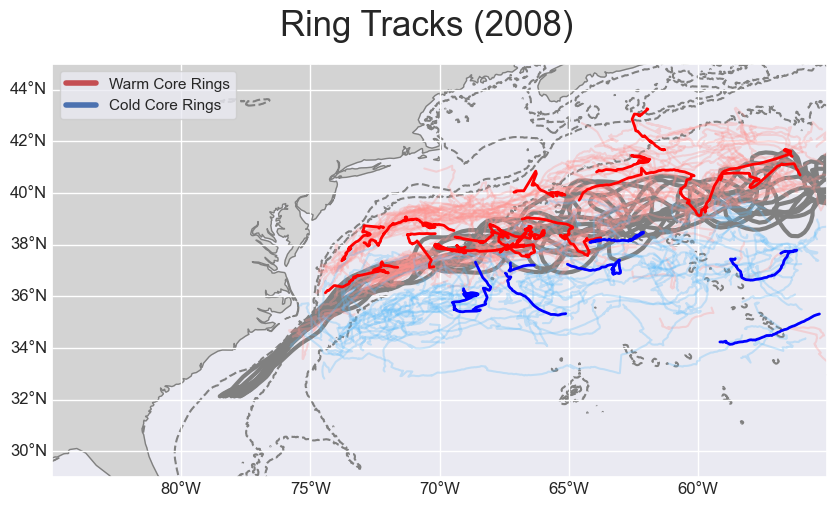

In [51]:
# map of the ring tracks for a given year
ring_filt_map_zones_year(zone_wcrs, zone_ccrs, bathy, 'Ring Tracks', 2008, 100);

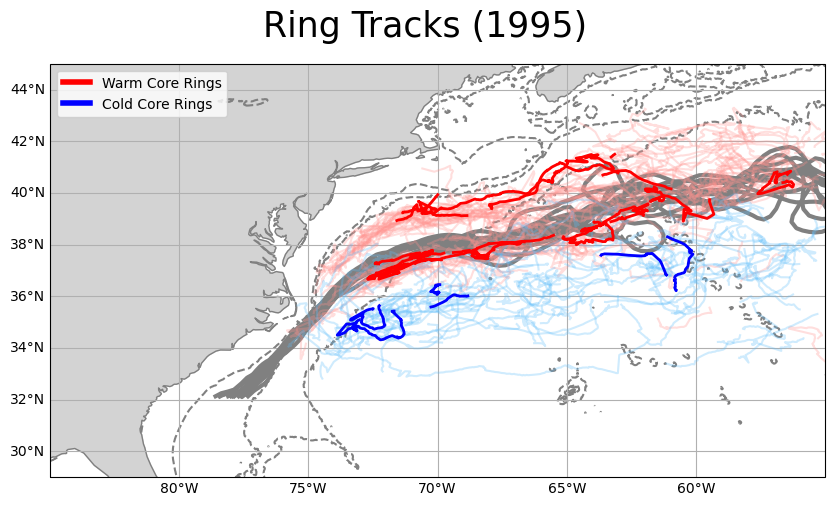

In [7]:
ring_filt_map_zones_year(zone_wcrs, zone_ccrs, bathy, 'Ring Tracks', 1995, 100);

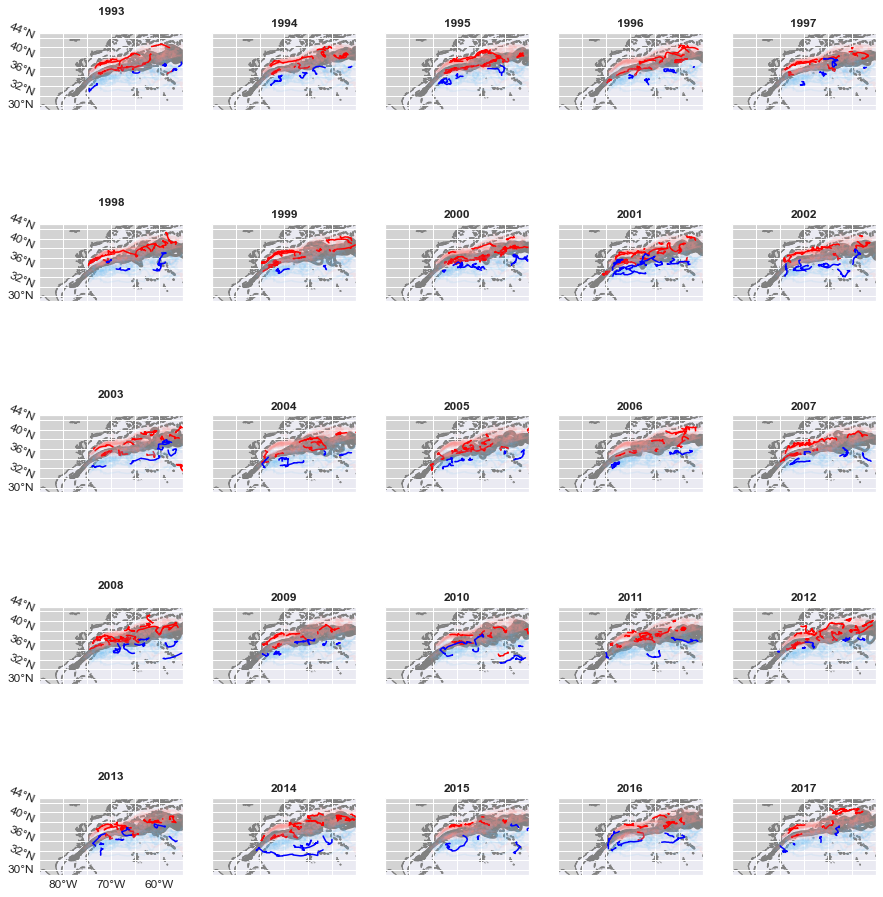

In [53]:
# # plots a 5x5 grid of 25 years of annual ring formations
eddy_filt_map_grid(zone_wcrs, zone_ccrs, bathy, 'Ring Tracks (1993-2017)');

In [54]:
## makes a GIF of all the formations of CCRs, WCRs from 1993 to 2017, stepping through at yearly intervals   
# make_gif(zone_wcrs, zone_ccrs);

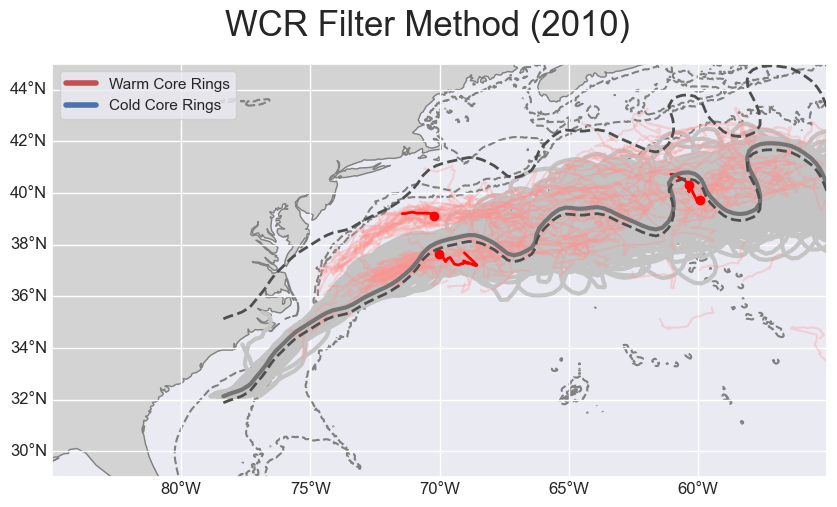

In [55]:
def ring_filt_map_zones_year(wcr_df, ccr_df, bathy, title, track_year, track_month, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        wcr_df (DataFrame)  : pandas dataframe of warm core rings
        ccr_df (DataFrame)  : pandas dataframe of cold core rings
        bathy (xarray)      : dataarray of northwest atlantic bathymetry 
        title (String)      : title of the figure
        track_year (Int)    : year of interest, e.g. 1993
        fig_quality (Int)   : quality of the figure (e.g. 100 dpi) 
    
    Output:
        fig (Figure)        : returns map of ring tracks for a given year 
                                (all tracks in light color and yearly tracks in bold color)

    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # gangopadhyay census bounds
    x_bnds = [-85,-55] # lon, NWA: [-82,-48]
    y_bnds = [29,45] # lat, NWA: [24,53]

    proj = ccrs.PlateCarree()

    # create figure 
    fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
    fig.set_dpi(fig_quality)
    fig.suptitle(title+' ('+str(track_year)+')', fontsize=25, y=0.875)
    
    # colors for lines
    colors = sns.color_palette("hls", 12)
    monthColors = ['#9ecae1','#4393c3','#2166ac','#8c510a','#bf812d','#f46d43','#d73027','#971700','#fddbc7','#d9f0d3','#5aae61','#1FC1F2']
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
#     # plot gs path for all years
#     for year in (np.arange(1993,2018)):
#         ax.plot(get_gs_year(year)[0],get_gs_year(year)[1],label=year, color='gray', linewidth=2);
        
        # plot all monthly paths for given year
    
        # plot gs path for all years
    for year in (np.arange(1993,2018)):
        for month in range(12):
            if track_year!=2018:
                ax.plot(get_gs_month(year,month-1)[0],get_gs_month(year,month-1)[1], color='#C4C4C4',linewidth=3); #color=monthColors[month]
            else:
                if month<5:
                    ax.plot(get_gs_month(year,month-1)[0],get_gs_month(year,month-1)[1], color='#C4C4C4',linewidth=3); #color=monthColors[month]

    # CCR filter method
    
    # add zone lines
    ax.plot([-75,29],[-75,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 1
    ax.plot([-70,29],[-70,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 2
    ax.plot([-65,29],[-65,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 3
    ax.plot([-60,29],[-60,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4
#     ax.plot([-55,29],[-55,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4.5

    for i in np.array(wcr_df['track'].unique()):
        eddy = wcr_df[wcr_df['track']==i]
        ax.plot(eddy['longitude'],eddy['latitude'],color='#FF938F',alpha=0.3) # track
#         ax.plot(get_eddy_formation_loc(eddy)[0],get_eddy_formation_loc(eddy)[1],color='green',marker='o') # formation
#         ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='red',marker='o') # demise

#     ## CCRs ##
#     for i in np.array(ccr_df['track'].unique()):
#         eddy = ccr_df[ccr_df['track']==i]
#         ax.plot(eddy['longitude'],eddy['latitude'],color='#60BEFA', alpha=0.3) # track
# #         ax.plot(get_eddy_formation_loc(eddy)[0],get_eddy_formation_loc(eddy)[1],color='green',marker='o') # formation
# #         ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='red',marker='o') # demise


    # plot YEAR tracks
    
    ## WCRs ##
    annual_eddy = wcr_df[(wcr_df['time'].dt.year == track_year) & (wcr_df['time'].dt.month == track_month)]
    for i in np.array(annual_eddy['track'].unique()):
        eddy = annual_eddy[annual_eddy['track']==i]
        ax.plot(eddy['longitude'],eddy['latitude'],color='red',linewidth=2) # track
        ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='red',marker='o') # demise


#     ## CCRs ##
#     annual_eddy = ccr_df[(ccr_df['time'].dt.year == track_year) & (ccr_df['time'].dt.month == track_month)]
#     for i in np.array(annual_eddy['track'].unique()):
#         eddy = annual_eddy[annual_eddy['track']==i]
#         ax.plot(eddy['longitude'],eddy['latitude'],color='blue',linewidth=2) # track
#         ax.plot(eddy['longitude'].iloc[0], eddy['latitude'].iloc[0], color='blue',marker='o') # demise
# #         ax.plot(get_eddy_formation_loc(eddy)[0],get_eddy_formation_loc(eddy)[1],color='green',marker='o') # formation

    # plot year, month gs in bold
    ax.plot(get_gs_month(track_year,track_month-1)[0],get_gs_month(track_year,track_month-1)[1], color='#747474',linewidth=3); #color=monthColors[month]
    
    # WCR filter method
    ax.plot(get_gs_month(track_year,track_month-1)[0],get_gs_month(track_year,track_month-1)[1]+3, color='#4E4E4E',linewidth=2, linestyle='--'); #color=monthColors[month]
    ax.plot(get_gs_month(track_year,track_month-1)[0],get_gs_month(track_year,track_month-1)[1]-0.25, color='#4E4E4E',linewidth=2, linestyle='--'); #color=monthColors[month]

#     # CCR filter method
#     ax.plot(get_gs_month(track_year,track_month-1)[0],get_gs_month(track_year,track_month-1)[1]-3, color='#4E4E4E',linewidth=2, linestyle='--'); #color=monthColors[month]
#     ax.plot(get_gs_month(track_year,track_month-1)[0],get_gs_month(track_year,track_month-1)[1]+0.25, color='#4E4E4E',linewidth=2, linestyle='--'); #color=monthColors[month]

       
    # axes formatting
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
    ax.coastlines(resolution='50m',color='gray')
    ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='lightgray')  
    
    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='r', lw=4), Line2D([0], [0], color='b', lw=4)]
    ax.legend(custom_lines, ['Anticyclonic', 'Cyclonic'])

    # gridlines
    gl = ax.gridlines(crs=proj,draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.yformatter = LATITUDE_FORMATTER
    gl.xformatter = LONGITUDE_FORMATTER
    
    return fig,ax

ring_filt_map_zones_year(zone_wcrs, zone_ccrs, bathy, 'WCR Filter Method', 2010, 7, 100);


In [6]:
import netCDF4 as nc

'open clark trajectory nc files'
# 1995
E01_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E01-95.nc')
E04_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E04-95.nc')
E05_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E05-95.nc')
E09_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E09-95.nc')
E13_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E13-95.nc')
E14_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E14-95.nc')
E16_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E16-95.nc')
E20_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E20-95.nc')
E25_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E25-95.nc')
E26_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E26-95.nc')
E28_95 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/E28-95.nc')

# 2008
B2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080102B.nc') 
E2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080201E.nc') 
G2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080204G.nc') 
I2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080312I.nc') 
K2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080321K.nc') 
J2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080324J.nc') 
N2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080425N.nc') 
P2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080516P.nc') 
Q2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080530Q.nc') 
R2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080604R.nc') 
W2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080723W.nc') 
X2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080728X.nc') 
Z2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080813Z.nc') 
a2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20080822a.nc') 
d2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20081006d.nc') 
e2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20081020e.nc') 
f2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20081110f.nc') 
k2008 = xr.open_dataset('/Users/elenaperez/Desktop/chatts/data/NCfile_subsetChelton/WE20081212k.nc') 


In [57]:
E01_95.Lat.values[0]

array([39.2687, 39.3172, 39.402 , 39.2136, 39.0107, 38.9816, 39.0081,
       39.2847, 39.2898, 39.2926, 39.2135, 39.1921, 39.3821, 39.358 ,
       39.3746, 39.3895, 39.3205, 39.3424, 39.3411, 39.2413, 39.2629,
       38.9906, 38.9803, 38.9575, 38.6252, 38.3314, 38.3747, 38.1719,
       37.8309, 37.8553, 37.6551, 37.6209, 37.622 , 37.8852, 37.8651,
       37.9483, 37.5371, 37.5764, 37.7382, 37.6695, 37.7582, 37.4553,
       37.5217, 37.5085, 37.2705, 37.0582, 36.8944, 36.9531])

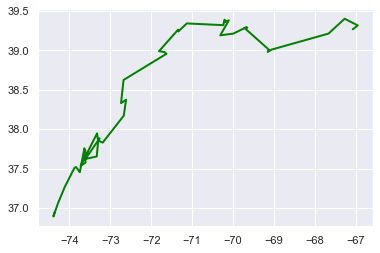

In [58]:
plt.plot(E01_95.Lon.values[0],E01_95.Lat.values[0],color='green',linewidth=2);


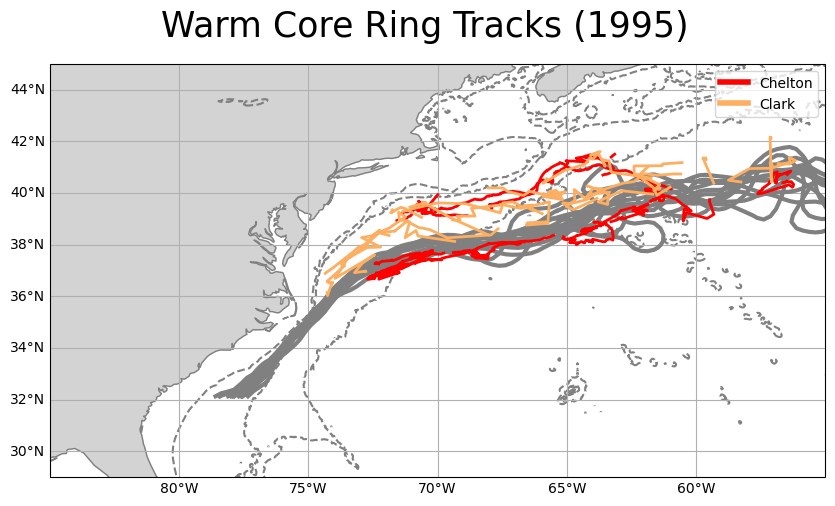

In [7]:
'PLOT CLARK PATHS FOR 1995 & 2008'
wcr_df=zone_wcrs
ccr_df=zone_ccrs
bathy=bathy
title='Warm Core Ring Tracks'
track_year=1995
fig_quality=100

# gangopadhyay census bounds
x_bnds = [-85,-55] # lon, NWA: [-82,-48]
y_bnds = [29,45] # lat, NWA: [24,53]

proj = ccrs.PlateCarree()

# create figure 
fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
fig.set_dpi(fig_quality)
fig.suptitle(title+' ('+str(track_year)+')', fontsize=25, y=0.875)

# colors for lines
colors = sns.color_palette("hls", 12)
monthColors = ['#9ecae1','#4393c3','#2166ac','#8c510a','#bf812d','#f46d43','#d73027','#971700','#fddbc7','#d9f0d3','#5aae61','#1FC1F2']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#     # plot gs path for all years
#     for year in (np.arange(1993,2018)):
#         ax.plot(get_gs_year(year)[0],get_gs_year(year)[1],label=year, color='gray', linewidth=2);

    # plot all monthly paths for given year
for month in range(12):
    if track_year!=2018:
        ax.plot(get_gs_month(track_year,month-1)[0],get_gs_month(track_year,month-1)[1], color='grey',linewidth=3); #color=monthColors[month]
    else:
        if month<5:
            ax.plot(get_gs_month(track_year,month-1)[0],get_gs_month(track_year,month-1)[1], color='grey',linewidth=3); #color=monthColors[month]


# add zone lines
ax.plot([-75,29],[-75,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 1
ax.plot([-70,29],[-70,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 2
ax.plot([-65,29],[-65,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 3
ax.plot([-60,29],[-60,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4
#     ax.plot([-55,29],[-55,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4.5

# for i in np.array(wcr_df['track'].unique()):
#     eddy = wcr_df[wcr_df['track']==i]
#     ax.plot(eddy['longitude'],eddy['latitude'],color='#FF938F',alpha=0.3) # track
# #         ax.plot(get_eddy_formation_loc(eddy)[0],get_eddy_formation_loc(eddy)[1],color='green',marker='o') # formation
# #         ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='red',marker='o') # demise

# ## CCRs ##
# for i in np.array(ccr_df['track'].unique()):
#     eddy = ccr_df[ccr_df['track']==i]
#     ax.plot(eddy['longitude'],eddy['latitude'],color='#60BEFA', alpha=0.3) # track
# #         ax.plot(get_eddy_formation_loc(eddy)[0],get_eddy_formation_loc(eddy)[1],color='green',marker='o') # formation
# #         ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='red',marker='o') # demise


# plot YEAR tracks

## WCRs ##
annual_eddy = wcr_df[(wcr_df['time'].dt.year == track_year)]
for i in np.array(annual_eddy['track'].unique()):
    eddy = annual_eddy[annual_eddy['track']==i]
    ax.plot(eddy['longitude'],eddy['latitude'],color='red',linewidth=2) # track

# ## CCRs ##
# annual_eddy = ccr_df[(ccr_df['time'].dt.year == track_year)]
# for i in np.array(annual_eddy['track'].unique()):
#     eddy = annual_eddy[annual_eddy['track']==i]
#     ax.plot(eddy['longitude'],eddy['latitude'],color='blue',linewidth=2) # track
# #         ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='red',marker='o') # demise
# #         ax.plot(get_eddy_formation_loc(eddy)[0],get_eddy_formation_loc(eddy)[1],color='green',marker='o') # formation

'CLARK RING TRAJECTORIES'
ax.plot(B2008.Lon.values[0],B2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(E2008.Lon.values[0],E2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(G2008.Lon.values[0],G2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(I2008.Lon.values[0],I2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(K2008.Lon.values[0],K2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(J2008.Lon.values[0],J2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(N2008.Lon.values[0],N2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(P2008.Lon.values[0],P2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(Q2008.Lon.values[0],Q2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(R2008.Lon.values[0],R2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(W2008.Lon.values[0],W2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(Z2008.Lon.values[0],Z2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(a2008.Lon.values[0],a2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(d2008.Lon.values[0],d2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(e2008.Lon.values[0],e2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(f2008.Lon.values[0],f2008.Lat.values[0],color='#fdae61',linewidth=2)
ax.plot(k2008.Lon.values[0],k2008.Lat.values[0],color='#fdae61',linewidth=2)


# axes formatting
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
ax.coastlines(resolution='50m',color='gray')
ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='lightgray')  

# custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='r', lw=4), Line2D([0], [0], color='#fdae61', lw=4)]
ax.legend(custom_lines, ['Chelton', 'Clark'])

# gridlines
gl = ax.gridlines(crs=proj,draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.yformatter = LATITUDE_FORMATTER
gl.xformatter = LONGITUDE_FORMATTER


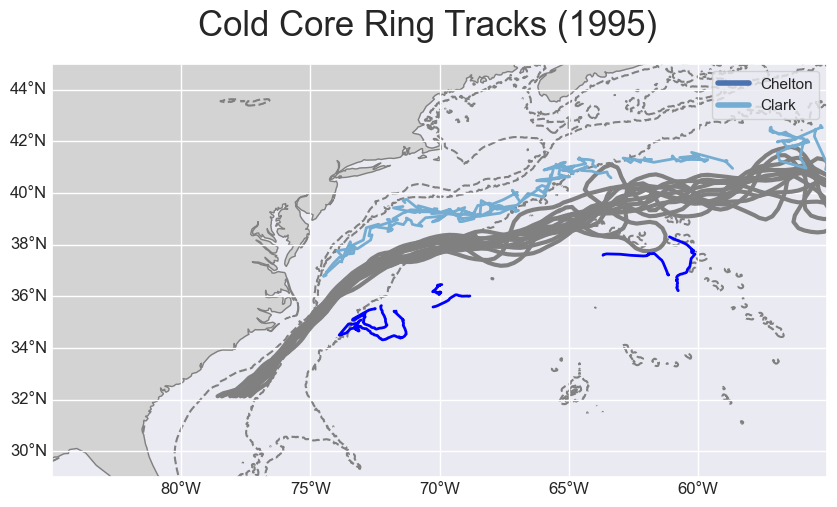

In [60]:
'PLOT CLARK PATHS FOR 1995 & 2008'
wcr_df=zone_wcrs
ccr_df=zone_ccrs
bathy=bathy
title='Cold Core Ring Tracks'
track_year=1995
fig_quality=100

# gangopadhyay census bounds
x_bnds = [-85,-55] # lon, NWA: [-82,-48]
y_bnds = [29,45] # lat, NWA: [24,53]

proj = ccrs.PlateCarree()

# create figure 
fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
fig.set_dpi(fig_quality)
fig.suptitle(title+' ('+str(track_year)+')', fontsize=25, y=0.875)

# colors for lines
colors = sns.color_palette("hls", 12)
monthColors = ['#9ecae1','#4393c3','#2166ac','#8c510a','#bf812d','#f46d43','#d73027','#971700','#fddbc7','#d9f0d3','#5aae61','#1FC1F2']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#     # plot gs path for all years
#     for year in (np.arange(1993,2018)):
#         ax.plot(get_gs_year(year)[0],get_gs_year(year)[1],label=year, color='gray', linewidth=2);

    # plot all monthly paths for given year
for month in range(12):
    if track_year!=2018:
        ax.plot(get_gs_month(track_year,month-1)[0],get_gs_month(track_year,month-1)[1], color='grey',linewidth=3); #color=monthColors[month]
    else:
        if month<5:
            ax.plot(get_gs_month(track_year,month-1)[0],get_gs_month(track_year,month-1)[1], color='grey',linewidth=3); #color=monthColors[month]


# add zone lines
ax.plot([-75,29],[-75,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 1
ax.plot([-70,29],[-70,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 2
ax.plot([-65,29],[-65,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 3
ax.plot([-60,29],[-60,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4
#     ax.plot([-55,29],[-55,45],transform=proj,linewidth=3,color='b',linestyle='-') # zone 4.5

# for i in np.array(wcr_df['track'].unique()):
#     eddy = wcr_df[wcr_df['track']==i]
#     ax.plot(eddy['longitude'],eddy['latitude'],color='#FF938F',alpha=0.3) # track
# #         ax.plot(get_eddy_formation_loc(eddy)[0],get_eddy_formation_loc(eddy)[1],color='green',marker='o') # formation
# #         ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='red',marker='o') # demise

# ## CCRs ##
# for i in np.array(ccr_df['track'].unique()):
#     eddy = ccr_df[ccr_df['track']==i]
#     ax.plot(eddy['longitude'],eddy['latitude'],color='#60BEFA', alpha=0.3) # track
# #         ax.plot(get_eddy_formation_loc(eddy)[0],get_eddy_formation_loc(eddy)[1],color='green',marker='o') # formation
# #         ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='red',marker='o') # demise


# plot YEAR tracks

# ## WCRs ##
# annual_eddy = wcr_df[(wcr_df['time'].dt.year == track_year)]
# for i in np.array(annual_eddy['track'].unique()):
#     eddy = annual_eddy[annual_eddy['track']==i]
#     ax.plot(eddy['longitude'],eddy['latitude'],color='red',linewidth=2) # track

## CCRs ##
annual_eddy = ccr_df[(ccr_df['time'].dt.year == track_year)]
for i in np.array(annual_eddy['track'].unique()):
    eddy = annual_eddy[annual_eddy['track']==i]
    ax.plot(eddy['longitude'],eddy['latitude'],color='blue',linewidth=2) # track
#         ax.plot(eddy['longitude'].iloc[-1], eddy['latitude'].iloc[-1], color='red',marker='o') # demise
#         ax.plot(get_eddy_formation_loc(eddy)[0],get_eddy_formation_loc(eddy)[1],color='green',marker='o') # formation

'CLARK RING TRAJECTORIES'
ax.plot(E01_95.Lon.values[0],E01_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E04_95.Lon.values[0],E04_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E05_95.Lon.values[0],E05_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E09_95.Lon.values[0],E09_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E13_95.Lon.values[0],E13_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E14_95.Lon.values[0],E14_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E16_95.Lon.values[0],E16_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E20_95.Lon.values[0],E20_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E25_95.Lon.values[0],E25_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E26_95.Lon.values[0],E26_95.Lat.values[0],color='#74add1',linewidth=2)
ax.plot(E28_95.Lon.values[0],E28_95.Lat.values[0],color='#74add1',linewidth=2)



# axes formatting
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
ax.coastlines(resolution='50m',color='gray')
ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='lightgray')  

# custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='b', lw=4), Line2D([0], [0], color='#74add1', lw=4)]
ax.legend(custom_lines, ['Chelton', 'Clark'])

# gridlines
gl = ax.gridlines(crs=proj,draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.yformatter = LATITUDE_FORMATTER
gl.xformatter = LONGITUDE_FORMATTER
